<a href="https://colab.research.google.com/github/stevenfox/LSTM_Time-series_Classification/blob/master/Task_2_Time_Series_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2: Time Series Classification of User Movement Data



## 1. Dataset description 

### import initial libraries

In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
%tensorflow_version 1.x

TensorFlow 1.x selected.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


### Time-series dataset slice overview

In [0]:
# Read a sample file from the dataset to have a view of the structure
df1 = pd.read_csv('dataset/Ambient_Living_1.csv')
df10 = pd.read_csv('dataset/Ambient_Living_10.csv')


In [0]:
df1.head()

Sensor 1  Sensor 2  Sensor 3  Sensor 4
0  -0.90476     -0.48   0.28571      0.30
1  -0.57143     -0.32   0.14286      0.30
2  -0.38095     -0.28  -0.14286      0.35
3  -0.28571     -0.20  -0.47619      0.35
4  -0.14286     -0.20   0.14286     -0.20

In [0]:
df1.shape

(27, 4)

In [0]:
df10.head()

Sensor 1  Sensor 2  Sensor 3  Sensor 4
0  -0.42857     -0.56 -0.666670      0.35
1  -0.28571     -0.48  0.190480     -0.15
2  -0.14286     -0.32  0.047619     -0.15
3  -0.28571     -0.08  0.190480      0.10
4   0.00000     -0.20 -0.380950     -0.20

In [0]:
df10.shape

(25, 4)

### Read all time-series files

In [0]:
path = 'dataset/Ambient_Living_'
max_n_files = 216
sequences = list()
for i in range(1,max_n_files +1 ):
    file_path = path + str(i) + '.csv'
    print(file_path)
    df = pd.read_csv(file_path, header=0)
    values = df.values
    sequences.append(values) # append all values from the files to a list

dataset/Ambient_Living_1.csv
dataset/Ambient_Living_2.csv
dataset/Ambient_Living_3.csv
dataset/Ambient_Living_4.csv
dataset/Ambient_Living_5.csv
dataset/Ambient_Living_6.csv
dataset/Ambient_Living_7.csv
dataset/Ambient_Living_8.csv
dataset/Ambient_Living_9.csv
dataset/Ambient_Living_10.csv
dataset/Ambient_Living_11.csv
dataset/Ambient_Living_12.csv
dataset/Ambient_Living_13.csv
dataset/Ambient_Living_14.csv
dataset/Ambient_Living_15.csv
dataset/Ambient_Living_16.csv
dataset/Ambient_Living_17.csv
dataset/Ambient_Living_18.csv
dataset/Ambient_Living_19.csv
dataset/Ambient_Living_20.csv
dataset/Ambient_Living_21.csv
dataset/Ambient_Living_22.csv
dataset/Ambient_Living_23.csv
dataset/Ambient_Living_24.csv
dataset/Ambient_Living_25.csv
dataset/Ambient_Living_26.csv
dataset/Ambient_Living_27.csv
dataset/Ambient_Living_28.csv
dataset/Ambient_Living_29.csv
dataset/Ambient_Living_30.csv
dataset/Ambient_Living_31.csv
dataset/Ambient_Living_32.csv
dataset/Ambient_Living_33.csv
dataset/Ambient_Liv

In [0]:
# sample view of the first file in the list
sequences[0]
print(len(sequences))

216


### Various statistical metrics of the time-series

Some of the sequences in the list have dissimilar lengths. For this reason, we  will use the statistical analysis methods to construct a uniform dataset for training, validation and testing.

In [0]:
len_sequences = []
for seq in sequences:
    len_sequences.append(len(seq))
pd.Series(len_sequences).describe()


count    216.000000
mean      37.407407
std       14.948306
min       19.000000
25%       25.000000
50%       33.500000
75%       47.750000
max      103.000000
dtype: float64

In [0]:
len_sequences

[27,
 26,
 23,
 23,
 25,
 27,
 26,
 26,
 25,
 25,
 24,
 24,
 24,
 23,
 26,
 24,
 26,
 25,
 26,
 24,
 26,
 23,
 27,
 28,
 24,
 26,
 29,
 29,
 25,
 30,
 27,
 29,
 23,
 25,
 27,
 26,
 26,
 26,
 29,
 27,
 27,
 26,
 27,
 28,
 32,
 25,
 26,
 31,
 26,
 29,
 27,
 26,
 30,
 21,
 20,
 23,
 20,
 20,
 23,
 24,
 20,
 27,
 23,
 21,
 22,
 25,
 23,
 27,
 22,
 24,
 24,
 24,
 27,
 25,
 28,
 23,
 24,
 23,
 23,
 24,
 25,
 26,
 24,
 26,
 25,
 24,
 22,
 23,
 26,
 24,
 26,
 22,
 22,
 21,
 19,
 22,
 23,
 20,
 20,
 22,
 20,
 23,
 20,
 22,
 56,
 55,
 54,
 54,
 56,
 55,
 56,
 55,
 59,
 103,
 51,
 50,
 54,
 50,
 56,
 52,
 56,
 56,
 54,
 58,
 56,
 53,
 47,
 56,
 51,
 52,
 74,
 34,
 35,
 37,
 36,
 39,
 37,
 43,
 41,
 35,
 35,
 35,
 36,
 40,
 36,
 35,
 33,
 35,
 29,
 31,
 32,
 37,
 45,
 43,
 42,
 45,
 36,
 43,
 42,
 42,
 39,
 36,
 40,
 47,
 41,
 40,
 44,
 43,
 38,
 47,
 46,
 45,
 47,
 42,
 46,
 39,
 60,
 61,
 62,
 68,
 65,
 56,
 60,
 65,
 65,
 64,
 65,
 55,
 56,
 59,
 62,
 63,
 59,
 64,
 64,
 62,
 61,
 62,
 59,
 62,

### Read Target Dataset 

In [0]:
targets = pd.read_csv('dataset/Ambient_Living_target.csv')

In [0]:
targets.head()

#sequence_ID   class_label
0             1             1
1             2             1
2             3             1
3             4             1
4             5             1

In [0]:
targets.tail()

#sequence_ID   class_label
211           212            -1
212           213            -1
213           214            -1
214           215            -1
215           216            -1

In [0]:
#acquire class values only

targets = targets.values[:,1]
print(targets)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


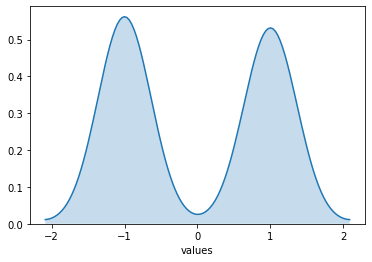

In [0]:
# distribution of target values

plt.xlabel('values')
sns.kdeplot(targets, shade=True)

In [0]:
#Cropping and Padding up to 80th quartile across all available sequences 

to_pad = 103 # max value from the sequences. It is used to add padding
new_seq = []
for seq in sequences:
    len_seq = len(seq)
    # print('seq', len(seq))
    last_val = seq[-1]
    n = (to_pad - len_seq )
    # print('n: ', n)
    to_concat = np.repeat(seq[-1], n).reshape(4, n).transpose()
    new_one_seq = np.concatenate([seq, to_concat])
    new_seq.append(new_one_seq)
final_seq = np.stack(new_seq)

In [0]:
#truncate the sequence to length 54
from keras.preprocessing import sequence
seq_len = 54
final_seq=sequence.pad_sequences(final_seq, maxlen=seq_len, padding='post', dtype='float', truncating='post')

In [0]:
# Make train and test sets. 
#The validation set for the base model is the same as the test set.  

train = [final_seq[i] for i in range(1,137)]
test = [final_seq[i] for i in range(138,172)]

train_target = [targets[i] for i in range(1,137)]
test_target = [targets[i] for i in range(138,172)]

In [0]:

train = np.array(train)
test = np.array(test)

train_target = np.array(train_target)
train_target = (train_target+1)/2

test_target = np.array(test_target)
test_target = (test_target+1)/2

print('train: ',len(train))
print('target: ',len(train_target))
print('test: ',len(test))
print('target: ',len(test_target))


train:  136
target:  136
test:  34
target:  34


In [0]:
# function for plotting the performance of each epoch

def plot_histogram_of_performance(history_m):
  # print(history_m.history.keys())
  # print(history_m.history)

  max_point_acc = max(history_m.history['accuracy'])
  # summarize history for accuracy
  plt.figure(figsize=(12, 8))
  plt.ylim(0, 1)
  plt.plot(history_m.history['accuracy'])
  plt.plot(history_m.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.axhline(y = max_point_acc, alpha= 0.5, c='r', linestyle= '--', linewidth='1.5')
  
   # annotate the metrics
  
  plt.annotate('max ('+str(max_point_acc)+')', xy=(3, max_point_acc),  xycoords='data',
              xytext=(0.5, max_point_acc + 0.05), c='r', textcoords='axes fraction',
              verticalalignment='top', alpha=1
              )
  
  plt.show()

  # summarize history for loss
  plt.figure(figsize=(12, 8))
  plt.plot(history_m.history['loss'])
  plt.plot(history_m.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()


## 2.	Develop a long short-term memory (LSTM) recurrent neural network model

For the implementation, we use KERAS Deep Learning library to develop an LSTM model. The implementation's approach is to create a base model in a generic function that can accept optional parameters. The generic function is called **lstm_model()** and has three optional -hyper- parameters that you can adjust the **LSTM** model before you perform fit. Additionally, another baseline factor, we consider an **adam** optimizer and checkpoint that retains the best outcome of every epoch. Hence, every tuning that we are going to perform later on, will be along with that parametrisation. 


In [0]:
def lstm_model(n_neurons = 256 ,loss_f = 'binary_crossentropy', activation_f = 'sigmoid'):
   
  """
  n_neurons = units in LSTM model. 
  We consider 256 as a suitable number of dimensions of 
  the output space in regards to the time-series dataset.

  loss_f = for binary classification we use binary_crossentropy. 
  We consider it a good combination with the ouput of sigmoid activation
  function and therefore it prevents over or underflow numbers outcome.

  activation_f = activation function.  We consider sigmoid 
  for the base configuration as the output can be determined 
  by either let no flow or entire flow of information to outcome. 
  It is a good indication of observing the performance of the model.

-- Internal hyper parameters configuration --
  Adam optimizer for optimising the weight parameters and minimise the loss function.
  We consider adam optimiser due to its robustness and fitness with our case. 
  Also, we prefer 0.001 learning rate for the time-series dataset. 

  Returns: lstm model

  """
   
  model = Sequential()
  model.add(LSTM(n_neurons, input_shape=(seq_len, 4)))
  model.add(Dense(1, activation= activation_f))
  adam = Adam(lr=0.001)
  model.compile(loss= loss_f, optimizer=adam, metrics=['accuracy'])
  return model

In [0]:
# final_seq

In [0]:
_lstm_base_model = lstm_model()
chk = ModelCheckpoint('best_model_base.pkl', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
lstm_history = _lstm_base_model.fit(train, train_target, epochs=200, batch_size=128, callbacks=[chk], validation_data=(test,test_target))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 136 samples, validate on 34 samples
Epoch 1/200
136/136 [==============================] - 2s 16ms/step - loss: 0.6912 - accuracy: 0.5368 - val_loss: 0.8155 - val_accuracy: 0.2647

Epoch 00001: val_accuracy improved from -inf to 0.26471, saving model to best_model_base.pkl
Epoch 2/200
136/136 [==============================] - 0s 1ms/step - loss: 0.6749 - accuracy: 0.5882 - val_loss: 0.8936 - val_accuracy: 0.2353

Epoch 00002: val_accuracy did not improve from 0.26471
Epoch 3/200
136/136 [==============================] - 0s 1ms/step - loss: 0.6679 - accuracy: 0.6176 - val_loss: 0.8675 - val_accuracy: 0.0882

Epoch 00003: val_accuracy did not improve from 0.26471
Epoch 4/200
136/136 [==============================] - 0s 1ms/step - loss: 0.6530 - accuracy: 0.6471 - val_loss: 0.8781 - val_accuracy: 0.0882


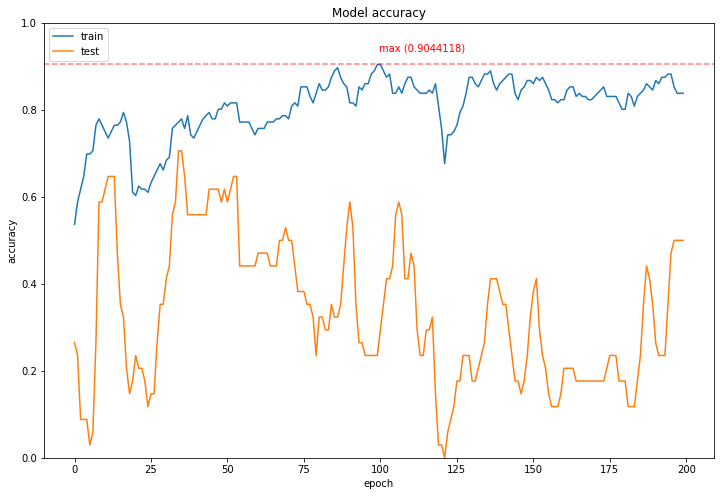

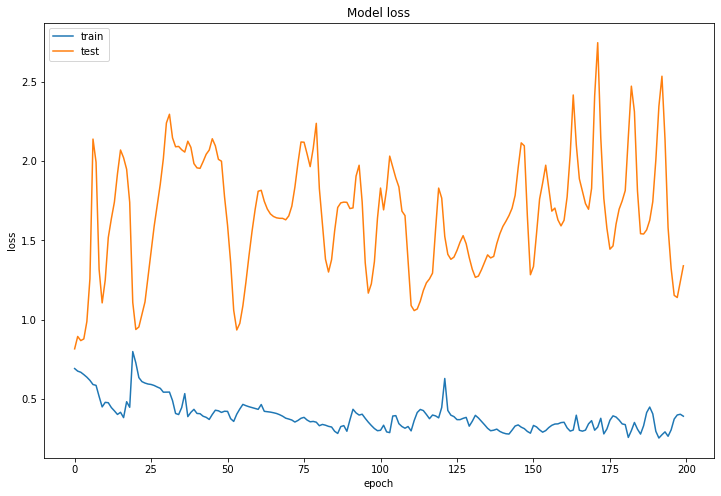

In [0]:
plot_histogram_of_performance(lstm_history)

In [0]:
#loading the model and scoring the accuracy on the test data

_lstm_model = load_model('best_model_base.pkl')

from sklearn.metrics import accuracy_score
test_preds = _lstm_model.predict_classes(test)
accuracy_score(test_target, test_preds)

0.7058823529411765

In [0]:
df = pd.DataFrame({'name': ['Raphael', 'Donatello'],
                    'mask': ['red', 'purple'],
                    'weapon': ['sai', 'bo staff']})
df.to_csv('test.csv')

## 3. 10 Fold Validation 


In [0]:
def plot_bar_KFold_score(cvscores):
  scores = pd.DataFrame(cvscores,columns=['Accuracy'])

  
# generate labels
  x =[]

  for i in range(len(scores)):
    x.append('kfold-'+ str(i+1))

  sns.set(style="white", rc={"lines.linewidth": 3})
  plt.figure(figsize=(15,8))
  sns.barplot(x,y="Accuracy",data=scores)
  plt.ylim(0, 100)
  # plot the metrics
  plt.axhline(y = max(scores['Accuracy']), alpha= 0.5, c='r', linestyle= '--', linewidth='1.5')
  plt.axhline(y =(scores['Accuracy'].mean()), alpha= 0.5, c='y',  linestyle= '--', linewidth='1.5')
  plt.axhline(y =(scores['Accuracy'].std()), alpha= 0.5, c='b' , linestyle= '--', linewidth='1.5')


  max_point_text = float(max(scores['Accuracy'])*0.01)
  mean_point_text = float((scores['Accuracy'].mean())*0.01)
  std_point_text = float((scores['Accuracy'].std())*0.01)

  print('max: ',max_point_text)
  print('mean: ',mean_point_text)
  print('std: ',std_point_text)

  # annotate the metrics
  
  plt.annotate('max', xy=(3, max_point_text),  xycoords='data',
              xytext=(0.5, max_point_text + 0.05), c='r', textcoords='axes fraction',
              verticalalignment='top', alpha=1
              )

  plt.annotate('mean', xy=(3, mean_point_text),  xycoords='data',
              xytext=(0.7, mean_point_text - 0.025), c='y', textcoords='axes fraction',
              verticalalignment='top',alpha=1
              )

  plt.annotate('std', xy=(3, std_point_text),  xycoords='data',
              xytext=(0.2, std_point_text + 0.05), c='b', textcoords='axes fraction',
              verticalalignment='top', alpha=1
              )

  sns.set()
  plt.show()

In [0]:
# import the KFold library 
from sklearn.model_selection import KFold

In [0]:
def k_Fold(_lstm_k_model, model_name_eval, n_splits = 10, _batch_size = 128):

  """
  _lstm_k_model = lstm model for the cross validation
  
  model_name_eval = the name of the checkpoint file

  n_splits = number of K-Folds to iterate 

  _batch_size = the update weight size.
  We consider the size of 128 suitable for the base 
  cross validation due to training and 
  test dataset size.  

  """

  kfold = KFold(n_splits)

  cvscores = []
  i = 0

  #enumerate splits
  for train_k, test_k in kfold.split(final_seq, targets):
      i+=1
      print('\nK-Fold: ', i)

      # _lstm_k_model = lstm_model()
      chk = ModelCheckpoint(model_name_eval + '.pkl', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
      lstm_k_history = _lstm_k_model.fit(final_seq[train_k], targets[train_k], epochs=200, batch_size=_batch_size, callbacks=[chk], validation_data=(final_seq[test_k],targets[test_k]))

      #loading the model and calculating accuracy on the test k-fold data
      _lstm_k_model = load_model(model_name_eval +'.pkl')
      test_preds = _lstm_k_model.predict_classes(final_seq[test_k])
    
      print('accuracy: > ', accuracy_score(targets[test_k], test_preds))

      scores = _lstm_k_model.evaluate(final_seq[test_k], targets[test_k], verbose=0)
      print("%s: %.2f%%" % (_lstm_k_model.metrics_names[1], scores[1]*100))
      
      cvscores.append(scores[1] * 100)

      plot_histogram_of_performance(lstm_k_history)
    
  print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

  return cvscores
 


K-Fold:  1
Train on 194 samples, validate on 22 samples
Epoch 1/200
194/194 [==============================] - 1s 3ms/step - loss: 0.6970 - accuracy: 0.1856 - val_loss: 0.7206 - val_accuracy: 0.1818

Epoch 00001: val_accuracy improved from -inf to 0.18182, saving model to best_k_model_base.pkl
Epoch 2/200
194/194 [==============================] - 0s 1ms/step - loss: 0.5495 - accuracy: 0.0412 - val_loss: 0.7622 - val_accuracy: 0.2273

Epoch 00002: val_accuracy improved from 0.18182 to 0.22727, saving model to best_k_model_base.pkl
Epoch 3/200
194/194 [==============================] - 0s 1ms/step - loss: 0.3255 - accuracy: 0.0515 - val_loss: 1.0081 - val_accuracy: 0.2273

Epoch 00003: val_accuracy did not improve from 0.22727
Epoch 4/200
194/194 [==============================] - 0s 1ms/step - loss: -0.4348 - accuracy: 0.0258 - val_loss: 6.3774 - val_accuracy: 0.0000e+00

Epoch 00004: val_accuracy did not improve from 0.22727
Epoch 5/200
194/194 [==============================] - 0s 9

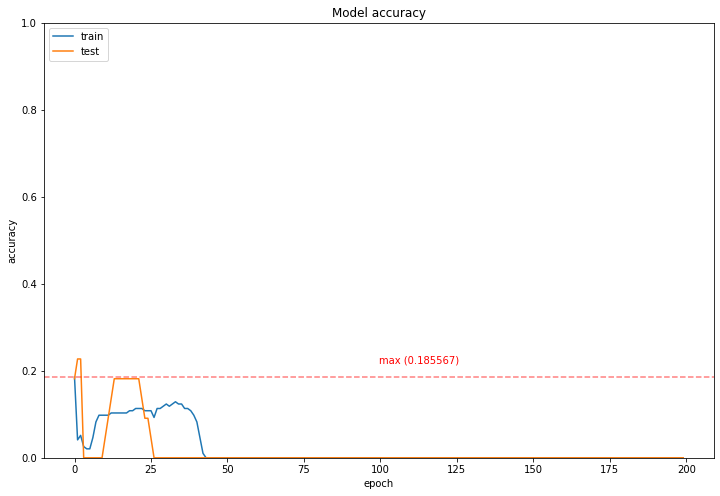

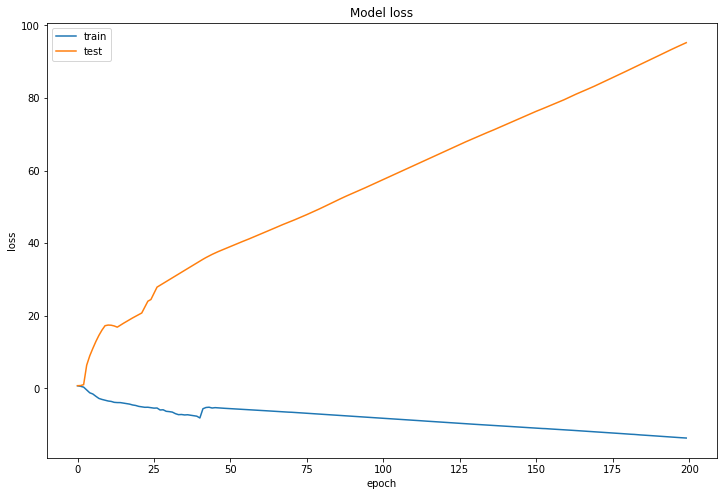


K-Fold:  2
Train on 194 samples, validate on 22 samples
Epoch 1/200
194/194 [==============================] - 1s 3ms/step - loss: 0.4376 - accuracy: 0.0670 - val_loss: -1.5006 - val_accuracy: 0.0455

Epoch 00001: val_accuracy improved from -inf to 0.04545, saving model to best_k_model_base.pkl
Epoch 2/200
194/194 [==============================] - 0s 999us/step - loss: -0.0344 - accuracy: 0.0567 - val_loss: -4.4099 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.04545
Epoch 3/200
194/194 [==============================] - 0s 1ms/step - loss: -0.1042 - accuracy: 0.0515 - val_loss: -4.7259 - val_accuracy: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.04545
Epoch 4/200
194/194 [==============================] - 0s 1ms/step - loss: -0.2113 - accuracy: 0.0876 - val_loss: -5.6980 - val_accuracy: 0.0455

Epoch 00004: val_accuracy did not improve from 0.04545
Epoch 5/200
194/194 [==============================] - 0s 938us/step - loss: -0.4727 - acc

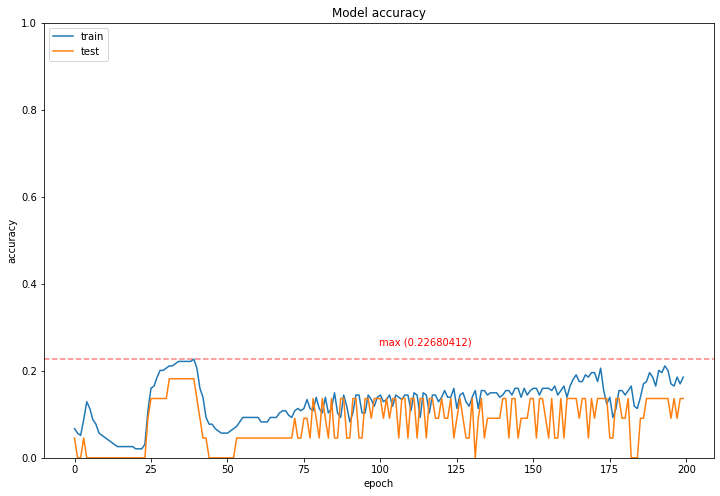

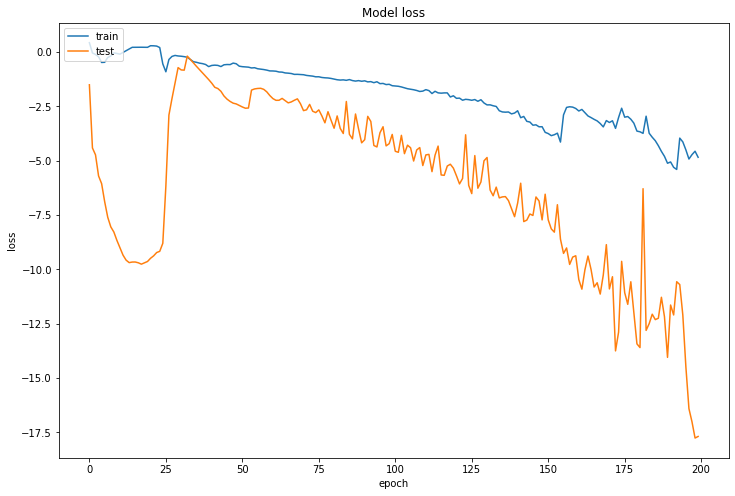


K-Fold:  3
Train on 194 samples, validate on 22 samples
Epoch 1/200
194/194 [==============================] - 1s 3ms/step - loss: 1.2055 - accuracy: 0.2320 - val_loss: -12.6295 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to best_k_model_base.pkl
Epoch 2/200
194/194 [==============================] - 0s 1ms/step - loss: 1.0696 - accuracy: 0.2371 - val_loss: -12.4563 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/200
194/194 [==============================] - 0s 1ms/step - loss: 0.9388 - accuracy: 0.2423 - val_loss: -12.3448 - val_accuracy: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.00000
Epoch 4/200
194/194 [==============================] - 0s 953us/step - loss: 0.8590 - accuracy: 0.2423 - val_loss: -12.0012 - val_accuracy: 0.0000e+00

Epoch 00004: val_accuracy did not improve from 0.00000
Epoch 5/200
194/194 [==============================] - 0s 1ms/step - loss: 0.8023

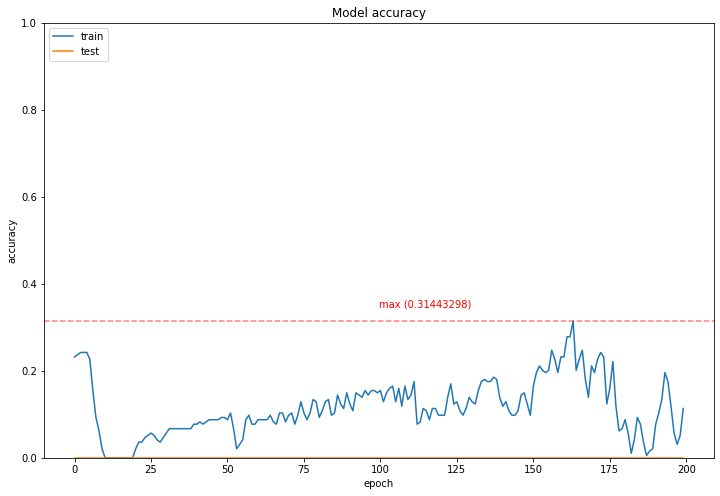

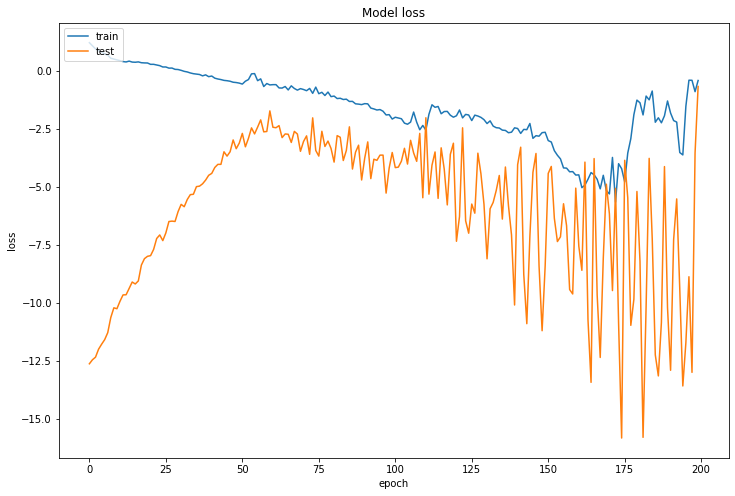


K-Fold:  4
Train on 194 samples, validate on 22 samples
Epoch 1/200
194/194 [==============================] - 1s 3ms/step - loss: -2.0552 - accuracy: 0.2371 - val_loss: 15.1504 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to best_k_model_base.pkl
Epoch 2/200
194/194 [==============================] - 0s 1ms/step - loss: -2.2010 - accuracy: 0.2423 - val_loss: 15.3744 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/200
194/194 [==============================] - 0s 1ms/step - loss: -2.2650 - accuracy: 0.2423 - val_loss: 15.7072 - val_accuracy: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.00000
Epoch 4/200
194/194 [==============================] - 0s 1ms/step - loss: -2.3766 - accuracy: 0.2423 - val_loss: 16.0417 - val_accuracy: 0.0000e+00

Epoch 00004: val_accuracy did not improve from 0.00000
Epoch 5/200
194/194 [==============================] - 0s 991us/step - loss: -2.486

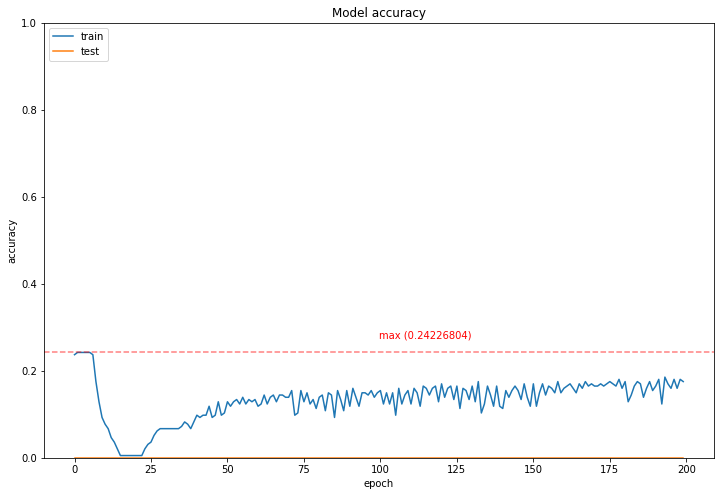

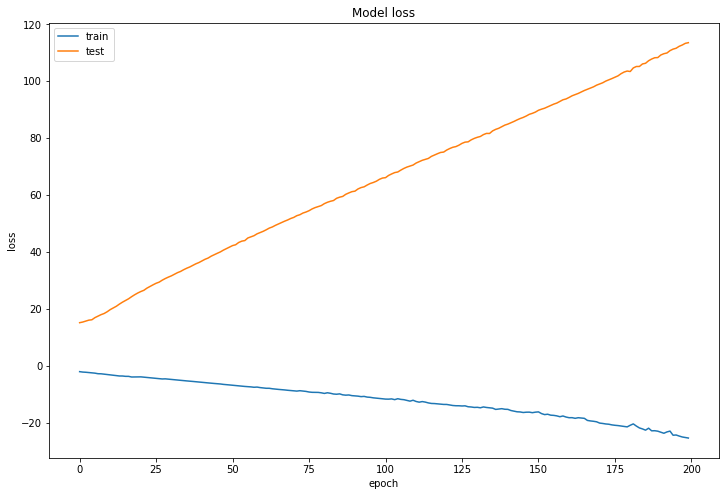


K-Fold:  5
Train on 194 samples, validate on 22 samples
Epoch 1/200
194/194 [==============================] - 1s 3ms/step - loss: 0.2223 - accuracy: 0.2165 - val_loss: -6.2023 - val_accuracy: 0.2273

Epoch 00001: val_accuracy improved from -inf to 0.22727, saving model to best_k_model_base.pkl
Epoch 2/200
194/194 [==============================] - 0s 1ms/step - loss: 0.1725 - accuracy: 0.2165 - val_loss: -6.2064 - val_accuracy: 0.2273

Epoch 00002: val_accuracy did not improve from 0.22727
Epoch 3/200
194/194 [==============================] - 0s 985us/step - loss: 0.1102 - accuracy: 0.2165 - val_loss: -6.2204 - val_accuracy: 0.2273

Epoch 00003: val_accuracy did not improve from 0.22727
Epoch 4/200
194/194 [==============================] - 0s 956us/step - loss: 0.0556 - accuracy: 0.2165 - val_loss: -6.1612 - val_accuracy: 0.2273

Epoch 00004: val_accuracy did not improve from 0.22727
Epoch 5/200
194/194 [==============================] - 0s 1ms/step - loss: -0.0037 - accuracy: 0.15

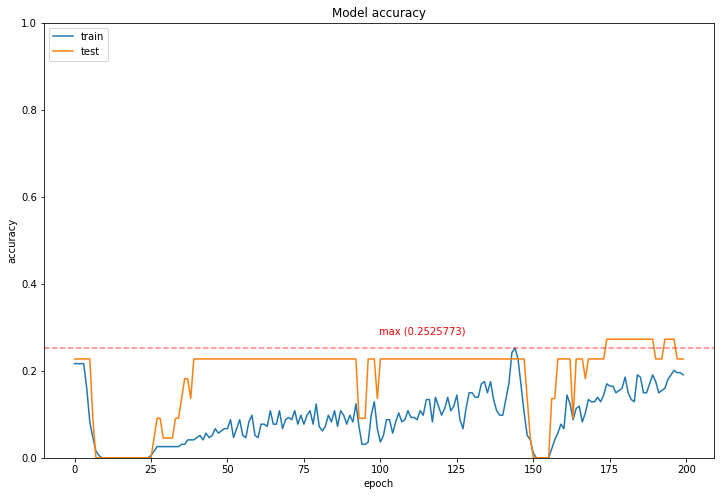

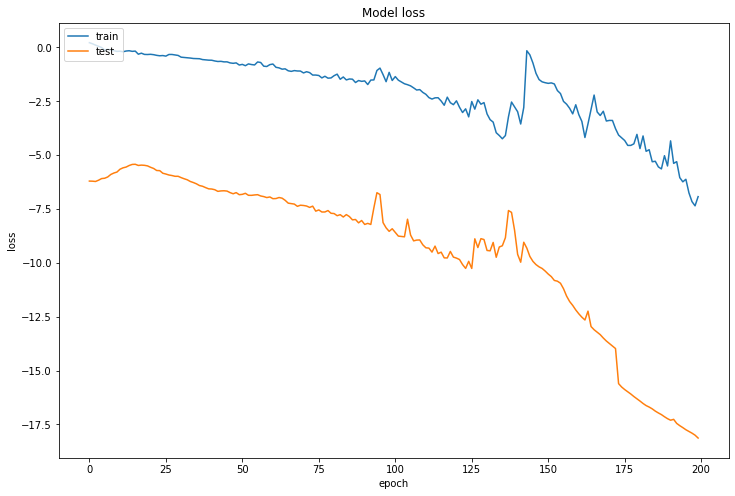


K-Fold:  6
Train on 194 samples, validate on 22 samples
Epoch 1/200
194/194 [==============================] - 1s 3ms/step - loss: -6.2855 - accuracy: 0.1186 - val_loss: 1.6641 - val_accuracy: 0.7273

Epoch 00001: val_accuracy improved from -inf to 0.72727, saving model to best_k_model_base.pkl
Epoch 2/200
194/194 [==============================] - 0s 1ms/step - loss: -6.5616 - accuracy: 0.1186 - val_loss: 1.7024 - val_accuracy: 0.7273

Epoch 00002: val_accuracy did not improve from 0.72727
Epoch 3/200
194/194 [==============================] - 0s 1ms/step - loss: -6.5999 - accuracy: 0.1134 - val_loss: 1.8902 - val_accuracy: 0.6364

Epoch 00003: val_accuracy did not improve from 0.72727
Epoch 4/200
194/194 [==============================] - 0s 1ms/step - loss: -6.7572 - accuracy: 0.1186 - val_loss: 2.1137 - val_accuracy: 0.5909

Epoch 00004: val_accuracy did not improve from 0.72727
Epoch 5/200
194/194 [==============================] - 0s 1ms/step - loss: -5.4580 - accuracy: 0.0876 -

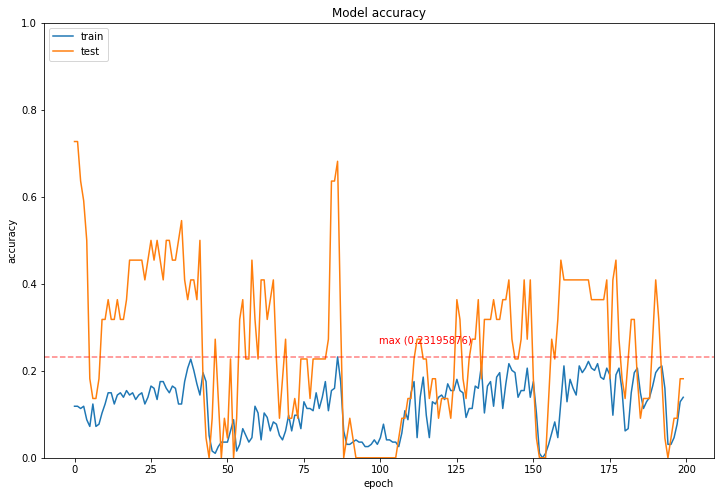

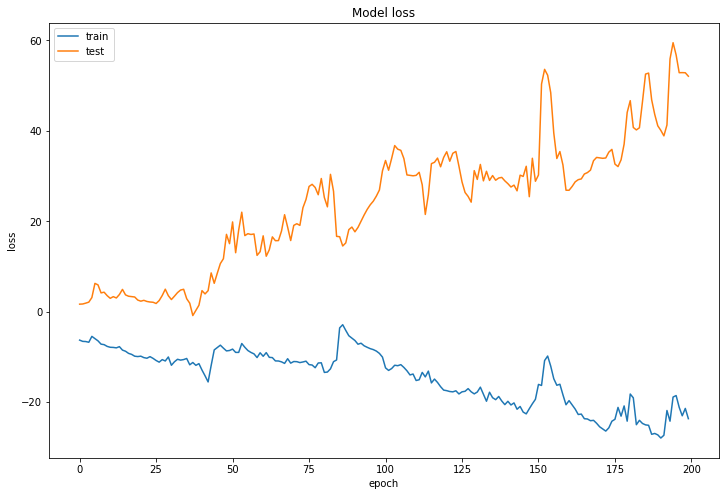


K-Fold:  7
Train on 195 samples, validate on 21 samples
Epoch 1/200
195/195 [==============================] - 1s 3ms/step - loss: -2.8481 - accuracy: 0.1949 - val_loss: -31.2870 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to best_k_model_base.pkl
Epoch 2/200
195/195 [==============================] - 0s 937us/step - loss: -2.6982 - accuracy: 0.1795 - val_loss: -31.5067 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/200
195/195 [==============================] - 0s 962us/step - loss: -2.5991 - accuracy: 0.1846 - val_loss: -31.5476 - val_accuracy: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.00000
Epoch 4/200
195/195 [==============================] - 0s 1ms/step - loss: -1.8020 - accuracy: 0.1590 - val_loss: -31.6320 - val_accuracy: 0.0000e+00

Epoch 00004: val_accuracy did not improve from 0.00000
Epoch 5/200
195/195 [==============================] - 0s 957us/step - loss

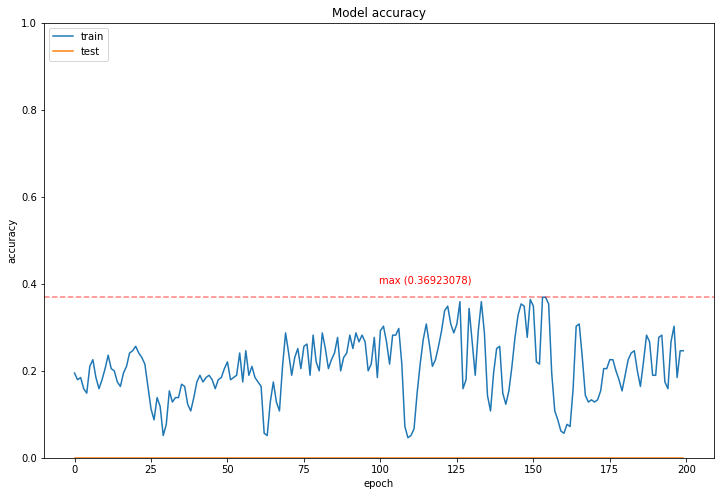

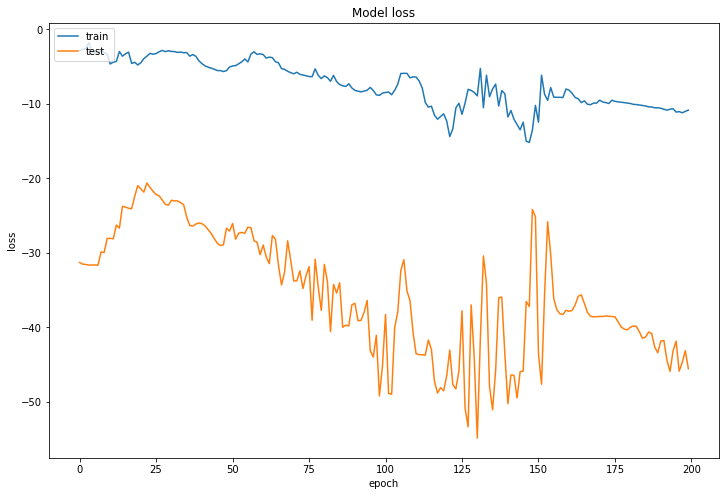


K-Fold:  8
Train on 195 samples, validate on 21 samples
Epoch 1/200
195/195 [==============================] - 1s 3ms/step - loss: -2.9748 - accuracy: 0.1795 - val_loss: -27.8627 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to best_k_model_base.pkl
Epoch 2/200
195/195 [==============================] - 0s 1ms/step - loss: -3.6441 - accuracy: 0.2103 - val_loss: -24.3053 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/200
195/195 [==============================] - 0s 956us/step - loss: -3.4676 - accuracy: 0.2000 - val_loss: -26.7419 - val_accuracy: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.00000
Epoch 4/200
195/195 [==============================] - 0s 1ms/step - loss: -3.9761 - accuracy: 0.2205 - val_loss: -27.2509 - val_accuracy: 0.0000e+00

Epoch 00004: val_accuracy did not improve from 0.00000
Epoch 5/200
195/195 [==============================] - 0s 1ms/step - loss: -3

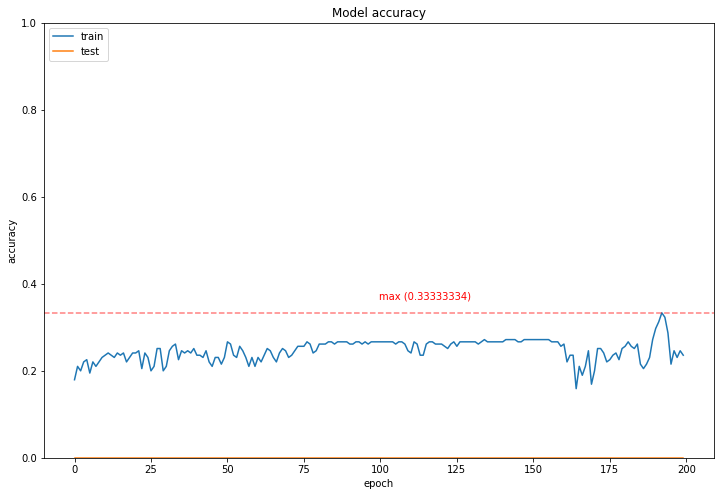

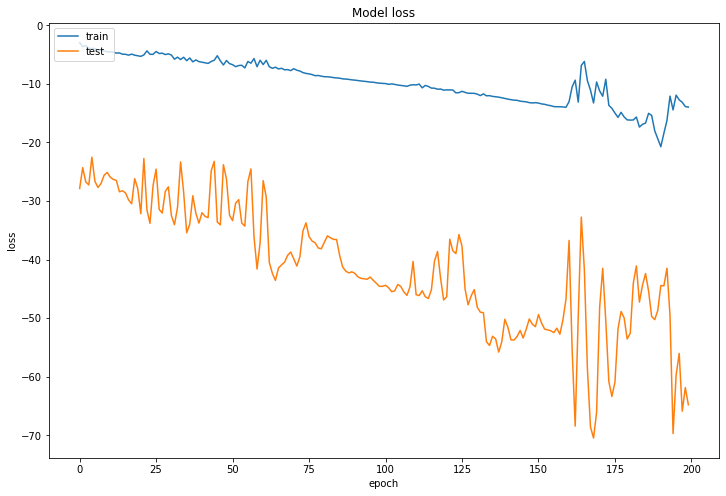


K-Fold:  9
Train on 195 samples, validate on 21 samples
Epoch 1/200
195/195 [==============================] - 1s 3ms/step - loss: -8.9711 - accuracy: 0.2051 - val_loss: 21.2311 - val_accuracy: 0.1429

Epoch 00001: val_accuracy improved from -inf to 0.14286, saving model to best_k_model_base.pkl
Epoch 2/200
195/195 [==============================] - 0s 1ms/step - loss: -9.3832 - accuracy: 0.2103 - val_loss: 22.0804 - val_accuracy: 0.0952

Epoch 00002: val_accuracy did not improve from 0.14286
Epoch 3/200
195/195 [==============================] - 0s 935us/step - loss: -9.2741 - accuracy: 0.2051 - val_loss: 22.0857 - val_accuracy: 0.0952

Epoch 00003: val_accuracy did not improve from 0.14286
Epoch 4/200
195/195 [==============================] - 0s 993us/step - loss: -9.6386 - accuracy: 0.2051 - val_loss: 22.5171 - val_accuracy: 0.0952

Epoch 00004: val_accuracy did not improve from 0.14286
Epoch 5/200
195/195 [==============================] - 0s 1ms/step - loss: -9.8368 - accuracy: 

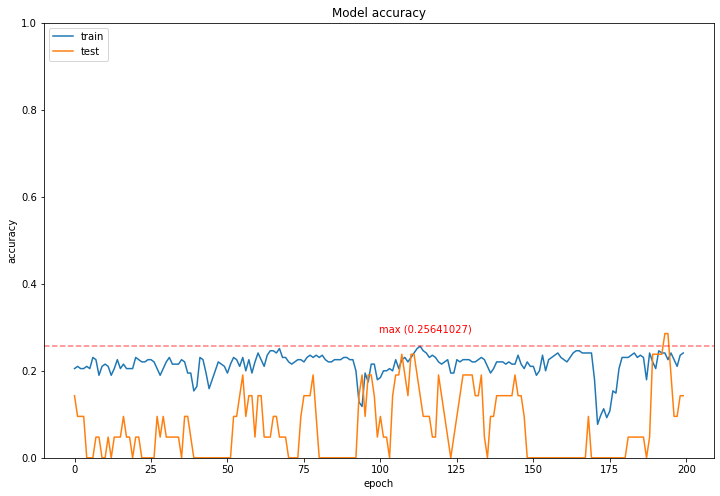

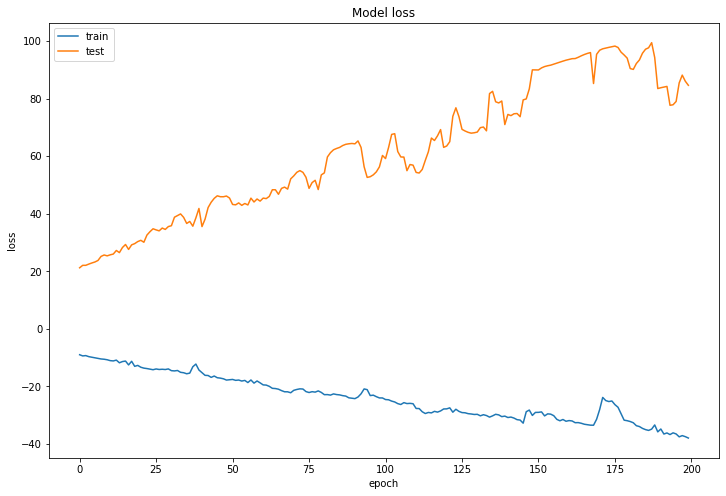


K-Fold:  10
Train on 195 samples, validate on 21 samples
Epoch 1/200
195/195 [==============================] - 1s 3ms/step - loss: -27.1136 - accuracy: 0.2513 - val_loss: -4.4669 - val_accuracy: 0.0476

Epoch 00001: val_accuracy improved from -inf to 0.04762, saving model to best_k_model_base.pkl
Epoch 2/200
195/195 [==============================] - 0s 1ms/step - loss: -28.1105 - accuracy: 0.2667 - val_loss: 1.0290 - val_accuracy: 0.0476

Epoch 00002: val_accuracy did not improve from 0.04762
Epoch 3/200
195/195 [==============================] - 0s 953us/step - loss: -28.2176 - accuracy: 0.2667 - val_loss: -1.0114 - val_accuracy: 0.0476

Epoch 00003: val_accuracy did not improve from 0.04762
Epoch 4/200
195/195 [==============================] - 0s 1ms/step - loss: -27.7529 - accuracy: 0.2615 - val_loss: -5.2946 - val_accuracy: 0.0476

Epoch 00004: val_accuracy did not improve from 0.04762
Epoch 5/200
195/195 [==============================] - 0s 1ms/step - loss: -27.7995 - accurac

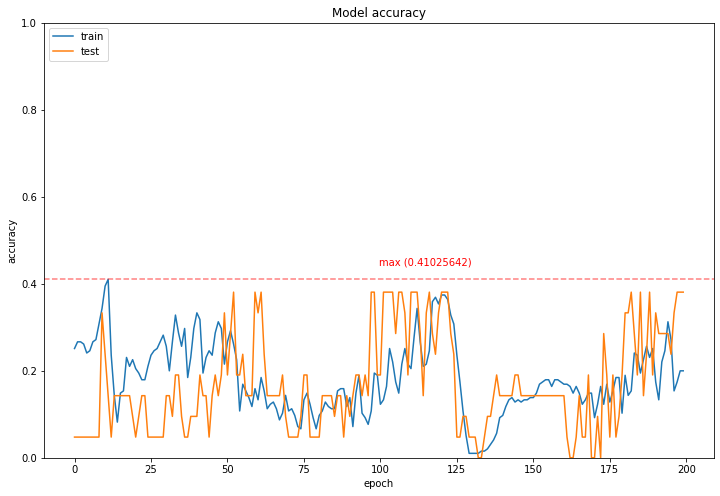

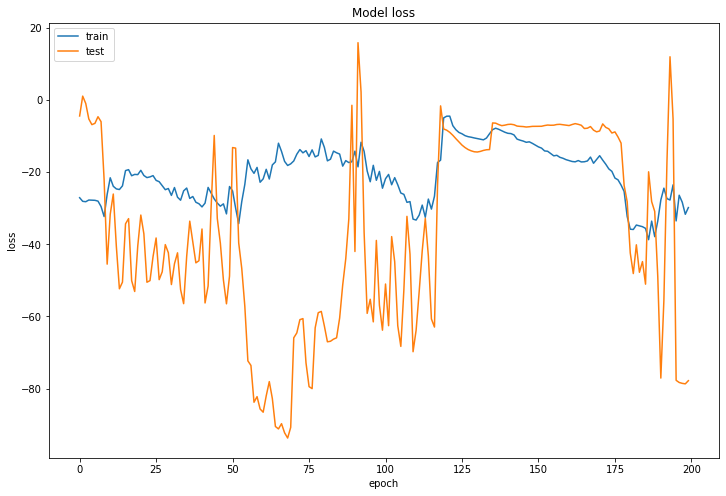

20.76% (+/- 22.00%)


In [0]:
_lstm_k_simple_model = lstm_model()
cvscores_simple_model = k_Fold(_lstm_k_simple_model, 'best_k_model_base')

#### Accuracy Score Plot in K-Fold Cross Validation

max:  0.7272727489471436
mean:  0.20757576376199724
std:  0.23187567915209173


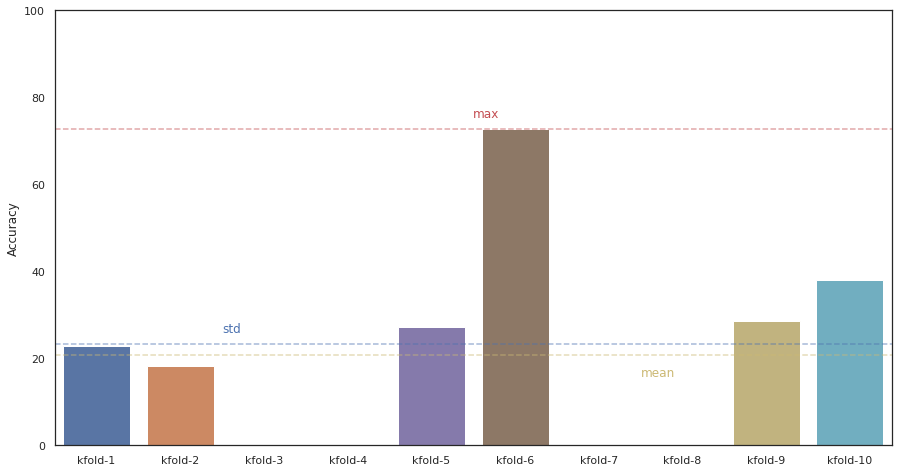

In [0]:
plot_bar_KFold_score(cvscores_simple_model)

## 4.	Implementation of three different lstm models

### 4.1 Adjusting activation function

Instead of utilising activation **sigmoid** function where the output can be determined  by either let no flow or entire flow of information to outcome, we employ **Tanh**. With **Tanh** we attempt to overcome the vanishing gradient problem which has second derivative that can sustain information for a long range prior reaches to zero (no information).




In [0]:
_lstm_activation_model = lstm_model(activation_f='tanh')
chk = ModelCheckpoint('best_model_activation.pkl', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
lstm_activation_m_history = _lstm_activation_model.fit(train, train_target, epochs=200, batch_size=128, callbacks=[chk], validation_data=(test,test_target))

#loading the model and calculating accuracy on the test data
_lstm_activation_model = load_model('best_model_activation.pkl')
test_preds = _lstm_activation_model.predict_classes(test)
print('accuracy: > ', accuracy_score(test_target, test_preds))

Train on 136 samples, validate on 34 samples
Epoch 1/200
136/136 [==============================] - 1s 8ms/step - loss: 6.2097 - accuracy: 0.4338 - val_loss: 0.0815 - val_accuracy: 1.0000

Epoch 00001: val_accuracy improved from -inf to 1.00000, saving model to best_model_activation.pkl
Epoch 2/200
136/136 [==============================] - 0s 1ms/step - loss: 5.4170 - accuracy: 0.4265 - val_loss: 0.1270 - val_accuracy: 0.9706

Epoch 00002: val_accuracy did not improve from 1.00000
Epoch 3/200
136/136 [==============================] - 0s 1ms/step - loss: 4.9749 - accuracy: 0.3750 - val_loss: 0.2059 - val_accuracy: 0.9412

Epoch 00003: val_accuracy did not improve from 1.00000
Epoch 4/200
136/136 [==============================] - 0s 1ms/step - loss: 3.2519 - accuracy: 0.3529 - val_loss: 0.4206 - val_accuracy: 0.7941

Epoch 00004: val_accuracy did not improve from 1.00000
Epoch 5/200
136/136 [==============================] - 0s 1ms/step - loss: 1.1734 - accuracy: 0.3382 - val_loss: 0.

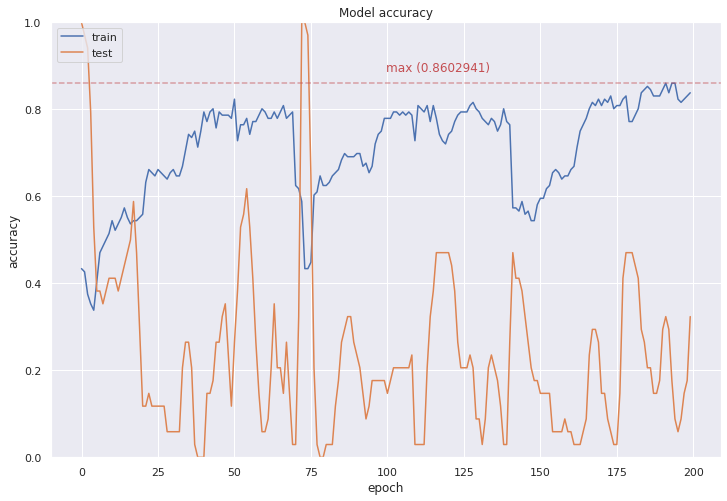

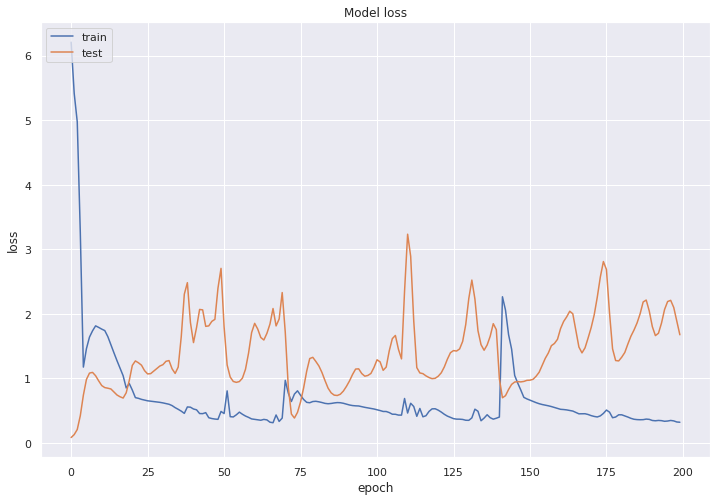

In [0]:
plot_histogram_of_performance(lstm_activation_m_history)

###10 Fold Validation 



K-Fold:  1
Train on 194 samples, validate on 22 samples
Epoch 1/200
194/194 [==============================] - 2s 8ms/step - loss: -2.4154 - accuracy: 0.0000e+00 - val_loss: 14.8342 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to best_k_model_activation.pkl
Epoch 2/200
194/194 [==============================] - 0s 1ms/step - loss: -1.5576 - accuracy: 0.0206 - val_loss: 14.8170 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/200
194/194 [==============================] - 0s 1ms/step - loss: -1.4624 - accuracy: 0.1959 - val_loss: 14.8083 - val_accuracy: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.00000
Epoch 4/200
194/194 [==============================] - 0s 1ms/step - loss: -1.3967 - accuracy: 0.2680 - val_loss: 14.8033 - val_accuracy: 0.0000e+00

Epoch 00004: val_accuracy did not improve from 0.00000
Epoch 5/200
194/194 [==============================] - 0s 1ms/step - loss

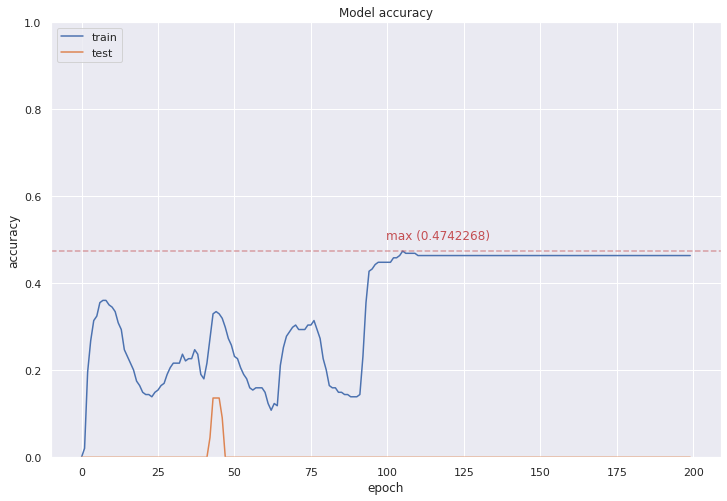

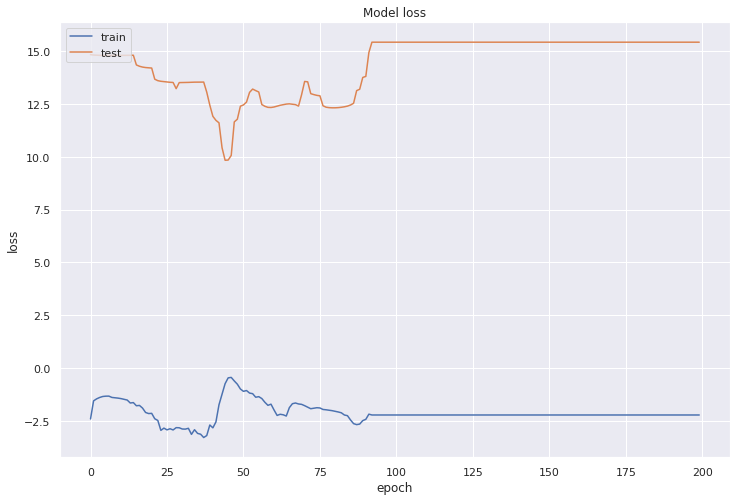


K-Fold:  2
Train on 194 samples, validate on 22 samples
Epoch 1/200
194/194 [==============================] - 1s 4ms/step - loss: 1.0100 - accuracy: 0.3351 - val_loss: -3.4472 - val_accuracy: 0.0909

Epoch 00001: val_accuracy improved from -inf to 0.09091, saving model to best_k_model_activation.pkl
Epoch 2/200
194/194 [==============================] - 0s 1ms/step - loss: 1.1976 - accuracy: 0.3299 - val_loss: -1.4954 - val_accuracy: 0.0909

Epoch 00002: val_accuracy did not improve from 0.09091
Epoch 3/200
194/194 [==============================] - 0s 992us/step - loss: 1.1186 - accuracy: 0.3247 - val_loss: -1.4555 - val_accuracy: 0.0455

Epoch 00003: val_accuracy did not improve from 0.09091
Epoch 4/200
194/194 [==============================] - 0s 971us/step - loss: 1.1131 - accuracy: 0.3196 - val_loss: -1.5409 - val_accuracy: 0.0455

Epoch 00004: val_accuracy did not improve from 0.09091
Epoch 5/200
194/194 [==============================] - 0s 986us/step - loss: 1.0373 - accurac

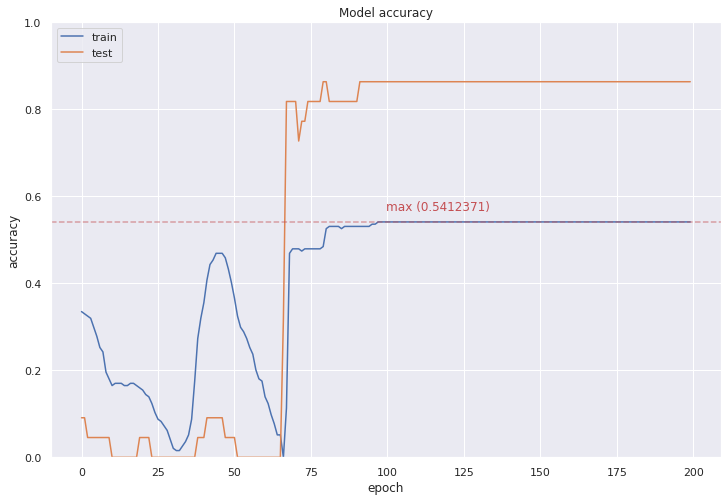

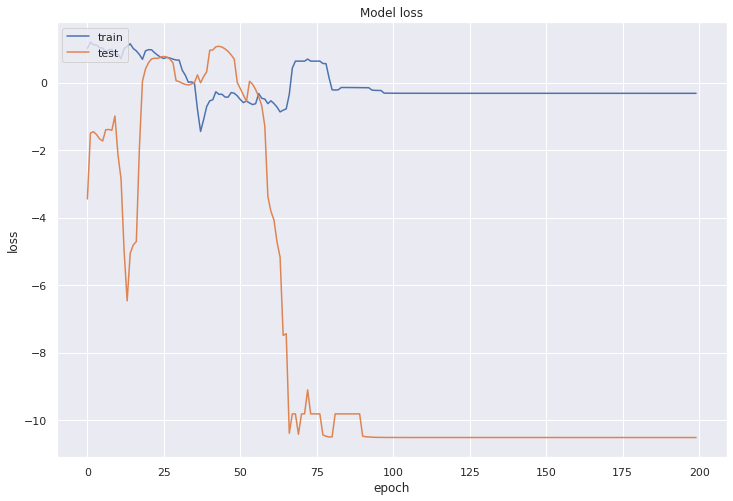


K-Fold:  3
Train on 194 samples, validate on 22 samples
Epoch 1/200
194/194 [==============================] - 1s 4ms/step - loss: 0.1831 - accuracy: 0.5206 - val_loss: -14.0227 - val_accuracy: 0.9545

Epoch 00001: val_accuracy improved from -inf to 0.95455, saving model to best_k_model_activation.pkl
Epoch 2/200
194/194 [==============================] - 0s 1ms/step - loss: 0.1803 - accuracy: 0.5206 - val_loss: -14.0227 - val_accuracy: 0.9545

Epoch 00002: val_accuracy did not improve from 0.95455
Epoch 3/200
194/194 [==============================] - 0s 1ms/step - loss: 0.2630 - accuracy: 0.5155 - val_loss: -14.0227 - val_accuracy: 0.9545

Epoch 00003: val_accuracy did not improve from 0.95455
Epoch 4/200
194/194 [==============================] - 0s 997us/step - loss: 0.3320 - accuracy: 0.5155 - val_loss: -14.0227 - val_accuracy: 0.9545

Epoch 00004: val_accuracy did not improve from 0.95455
Epoch 5/200
194/194 [==============================] - 0s 986us/step - loss: 0.3329 - accur

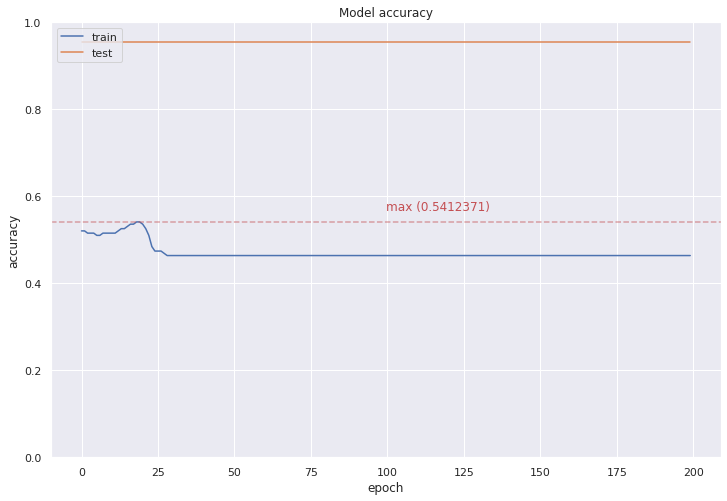

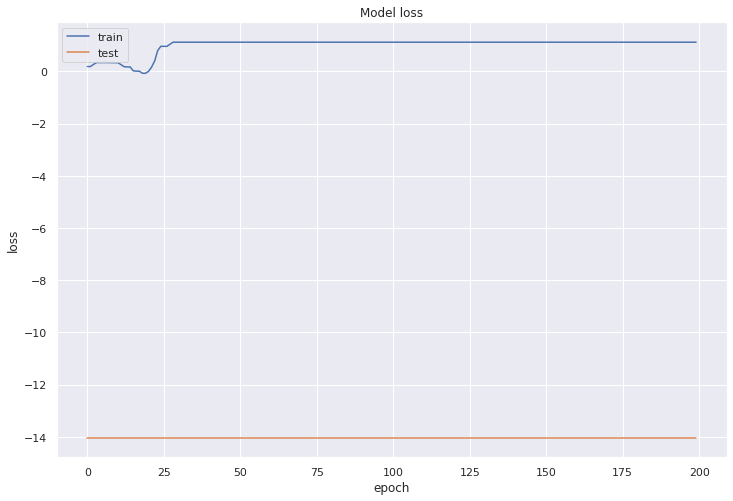


K-Fold:  4
Train on 194 samples, validate on 22 samples
Epoch 1/200
194/194 [==============================] - 1s 5ms/step - loss: -3.1612 - accuracy: 0.6289 - val_loss: 15.4249 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to best_k_model_activation.pkl
Epoch 2/200
194/194 [==============================] - 0s 1ms/step - loss: -3.0758 - accuracy: 0.6237 - val_loss: 15.4249 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/200
194/194 [==============================] - 0s 996us/step - loss: -3.0072 - accuracy: 0.6237 - val_loss: 15.4249 - val_accuracy: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.00000
Epoch 4/200
194/194 [==============================] - 0s 979us/step - loss: -3.0063 - accuracy: 0.6237 - val_loss: 15.4249 - val_accuracy: 0.0000e+00

Epoch 00004: val_accuracy did not improve from 0.00000
Epoch 5/200
194/194 [==============================] - 0s 987us/step - lo

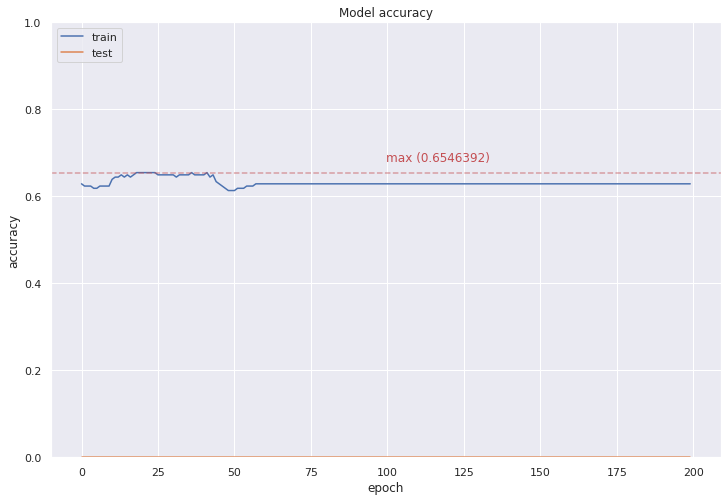

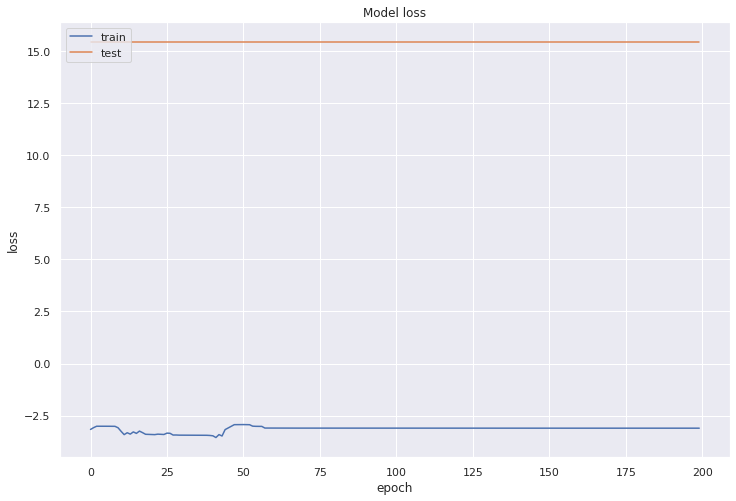


K-Fold:  5
Train on 194 samples, validate on 22 samples
Epoch 1/200
194/194 [==============================] - 1s 5ms/step - loss: -1.0083 - accuracy: 0.5567 - val_loss: -2.8045 - val_accuracy: 0.5909

Epoch 00001: val_accuracy improved from -inf to 0.59091, saving model to best_k_model_activation.pkl
Epoch 2/200
194/194 [==============================] - 0s 1ms/step - loss: -0.9402 - accuracy: 0.5567 - val_loss: -2.8045 - val_accuracy: 0.5909

Epoch 00002: val_accuracy did not improve from 0.59091
Epoch 3/200
194/194 [==============================] - 0s 984us/step - loss: -0.9386 - accuracy: 0.5515 - val_loss: -2.8045 - val_accuracy: 0.5909

Epoch 00003: val_accuracy did not improve from 0.59091
Epoch 4/200
194/194 [==============================] - 0s 1ms/step - loss: -0.9378 - accuracy: 0.5515 - val_loss: -2.8045 - val_accuracy: 0.5909

Epoch 00004: val_accuracy did not improve from 0.59091
Epoch 5/200
194/194 [==============================] - 0s 1ms/step - loss: -0.9392 - accura

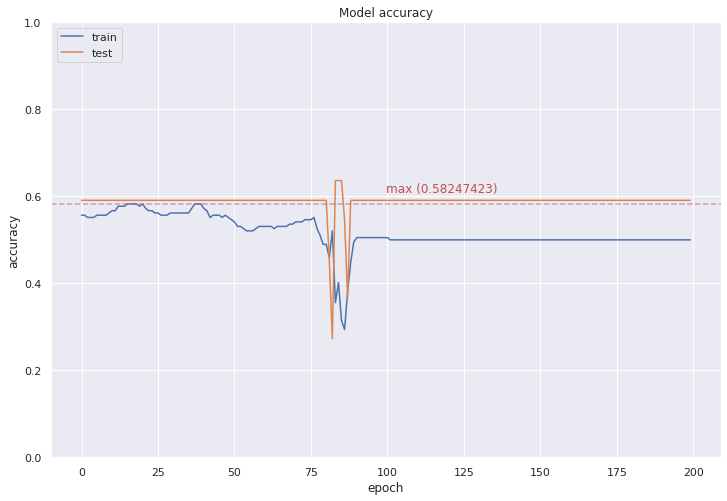

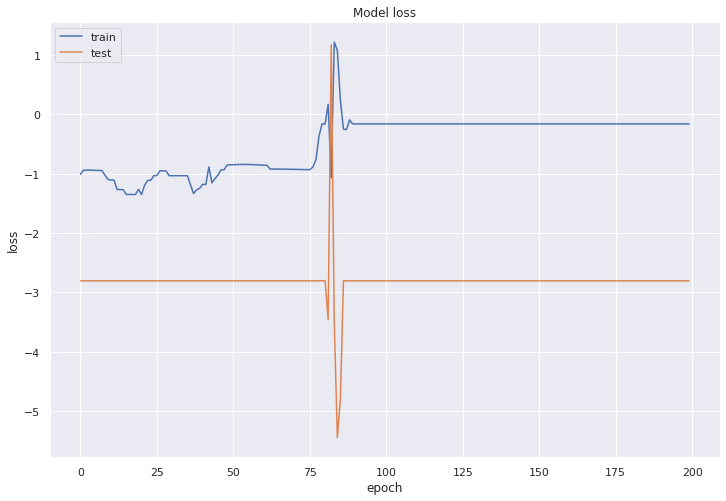


K-Fold:  6
Train on 194 samples, validate on 22 samples
Epoch 1/200
194/194 [==============================] - 1s 5ms/step - loss: -0.3945 - accuracy: 0.4330 - val_loss: 5.4703 - val_accuracy: 0.3182

Epoch 00001: val_accuracy improved from -inf to 0.31818, saving model to best_k_model_activation.pkl
Epoch 2/200
194/194 [==============================] - 0s 1ms/step - loss: -0.7769 - accuracy: 0.3918 - val_loss: 5.7354 - val_accuracy: 0.1818

Epoch 00002: val_accuracy did not improve from 0.31818
Epoch 3/200
194/194 [==============================] - 0s 1ms/step - loss: -1.1486 - accuracy: 0.2990 - val_loss: 10.1400 - val_accuracy: 0.0909

Epoch 00003: val_accuracy did not improve from 0.31818
Epoch 4/200
194/194 [==============================] - 0s 1ms/step - loss: -1.6886 - accuracy: 0.4897 - val_loss: 12.6204 - val_accuracy: 0.0909

Epoch 00004: val_accuracy did not improve from 0.31818
Epoch 5/200
194/194 [==============================] - 0s 1ms/step - loss: -1.8255 - accuracy: 

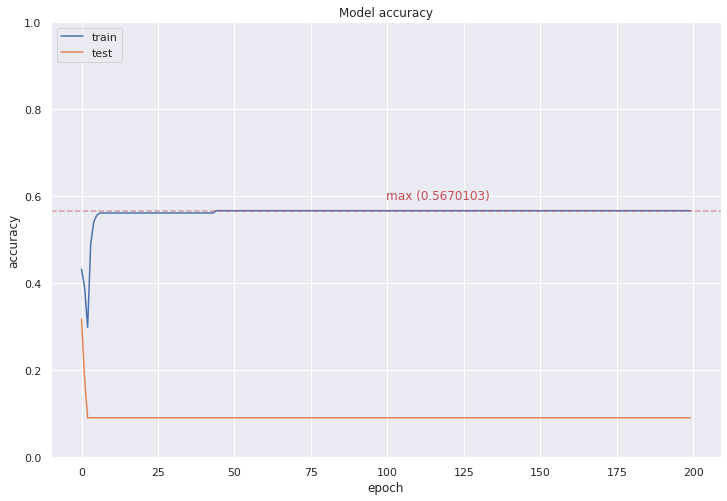

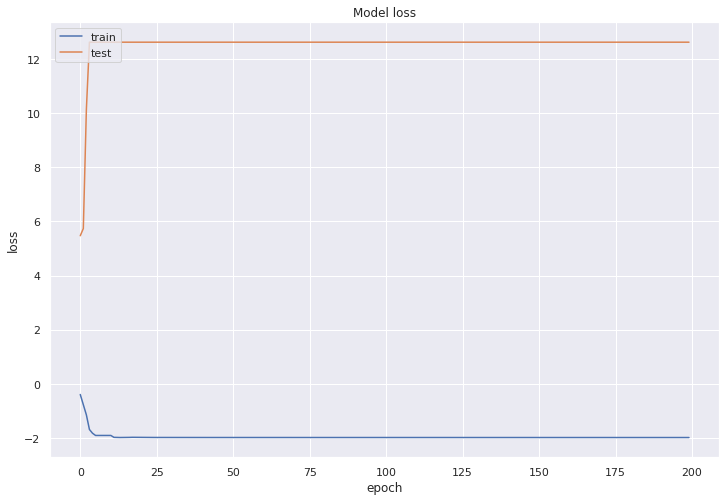


K-Fold:  7
Train on 195 samples, validate on 21 samples
Epoch 1/200
195/195 [==============================] - 1s 5ms/step - loss: 1.2735 - accuracy: 0.3333 - val_loss: -4.5999 - val_accuracy: 0.2381

Epoch 00001: val_accuracy improved from -inf to 0.23810, saving model to best_k_model_activation.pkl
Epoch 2/200
195/195 [==============================] - 0s 1ms/step - loss: 0.7235 - accuracy: 0.3590 - val_loss: -11.5894 - val_accuracy: 0.6667

Epoch 00002: val_accuracy improved from 0.23810 to 0.66667, saving model to best_k_model_activation.pkl
Epoch 3/200
195/195 [==============================] - 0s 973us/step - loss: 0.6130 - accuracy: 0.4256 - val_loss: -14.6656 - val_accuracy: 0.9048

Epoch 00003: val_accuracy improved from 0.66667 to 0.90476, saving model to best_k_model_activation.pkl
Epoch 4/200
195/195 [==============================] - 0s 1ms/step - loss: 0.9702 - accuracy: 0.4359 - val_loss: -13.9530 - val_accuracy: 0.8571

Epoch 00004: val_accuracy did not improve from 0.

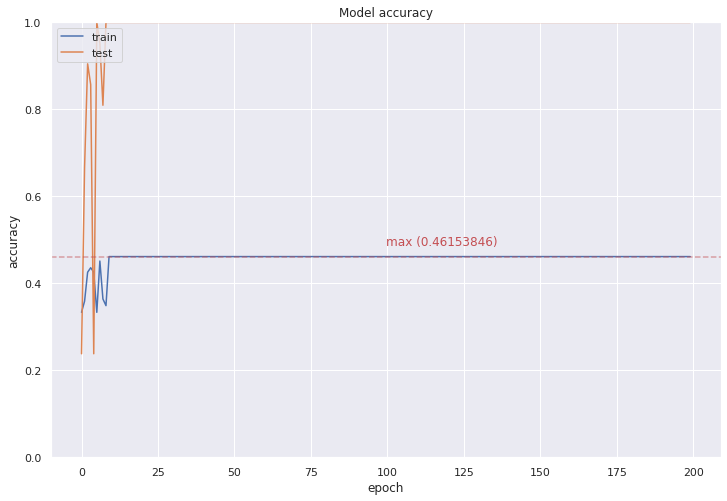

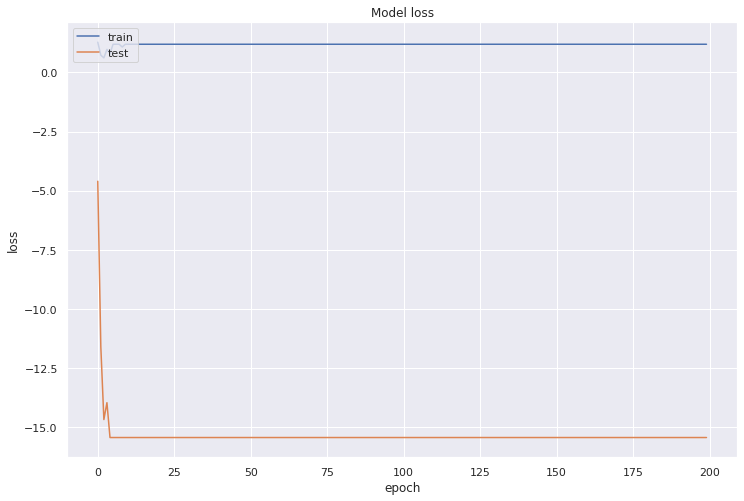


K-Fold:  8
Train on 195 samples, validate on 21 samples
Epoch 1/200
195/195 [==============================] - 1s 5ms/step - loss: 1.1865 - accuracy: 0.4564 - val_loss: -15.4249 - val_accuracy: 1.0000

Epoch 00001: val_accuracy improved from -inf to 1.00000, saving model to best_k_model_activation.pkl
Epoch 2/200
195/195 [==============================] - 0s 993us/step - loss: 1.1865 - accuracy: 0.3641 - val_loss: -15.4249 - val_accuracy: 0.6190

Epoch 00002: val_accuracy did not improve from 1.00000
Epoch 3/200
195/195 [==============================] - 0s 1ms/step - loss: 1.0696 - accuracy: 0.3487 - val_loss: -15.4249 - val_accuracy: 1.0000

Epoch 00003: val_accuracy did not improve from 1.00000
Epoch 4/200
195/195 [==============================] - 0s 989us/step - loss: 1.1865 - accuracy: 0.4615 - val_loss: -15.4249 - val_accuracy: 1.0000

Epoch 00004: val_accuracy did not improve from 1.00000
Epoch 5/200
195/195 [==============================] - 0s 981us/step - loss: 1.1865 - acc

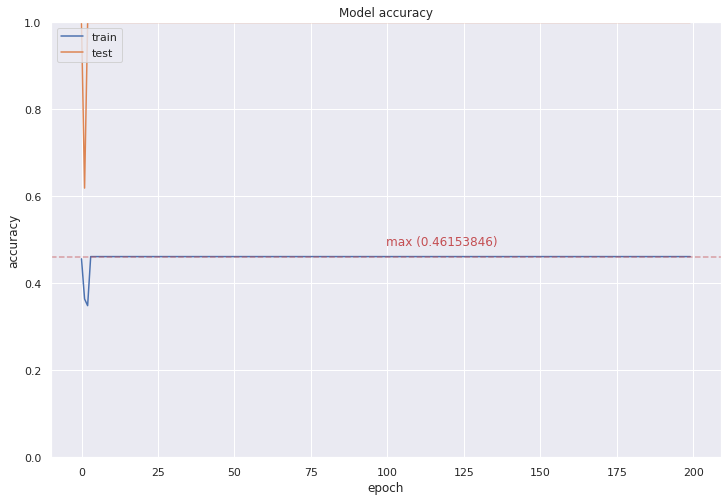

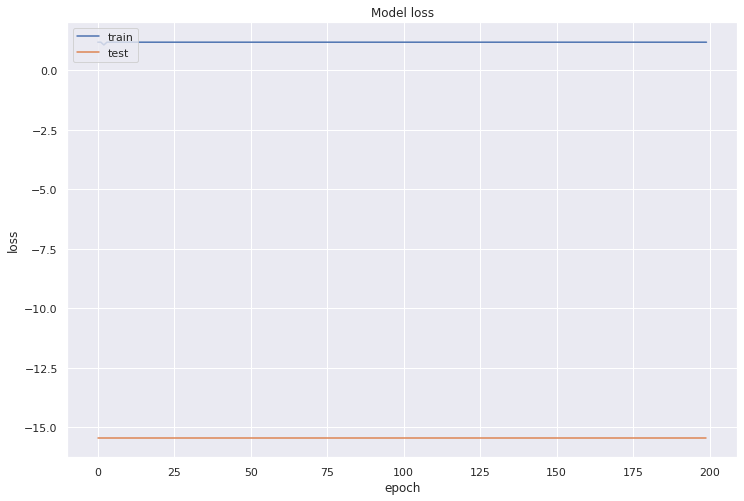


K-Fold:  9
Train on 195 samples, validate on 21 samples
Epoch 1/200
195/195 [==============================] - 1s 5ms/step - loss: -1.8194 - accuracy: 0.4154 - val_loss: 11.9257 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to best_k_model_activation.pkl
Epoch 2/200
195/195 [==============================] - 0s 961us/step - loss: -1.8759 - accuracy: 0.4205 - val_loss: 12.4869 - val_accuracy: 0.0952

Epoch 00002: val_accuracy improved from 0.00000 to 0.09524, saving model to best_k_model_activation.pkl
Epoch 3/200
195/195 [==============================] - 0s 1ms/step - loss: -1.8194 - accuracy: 0.5590 - val_loss: 12.4869 - val_accuracy: 0.0952

Epoch 00003: val_accuracy did not improve from 0.09524
Epoch 4/200
195/195 [==============================] - 0s 1ms/step - loss: -1.8194 - accuracy: 0.5590 - val_loss: 12.4869 - val_accuracy: 0.0952

Epoch 00004: val_accuracy did not improve from 0.09524
Epoch 5/200
195/195 [=================

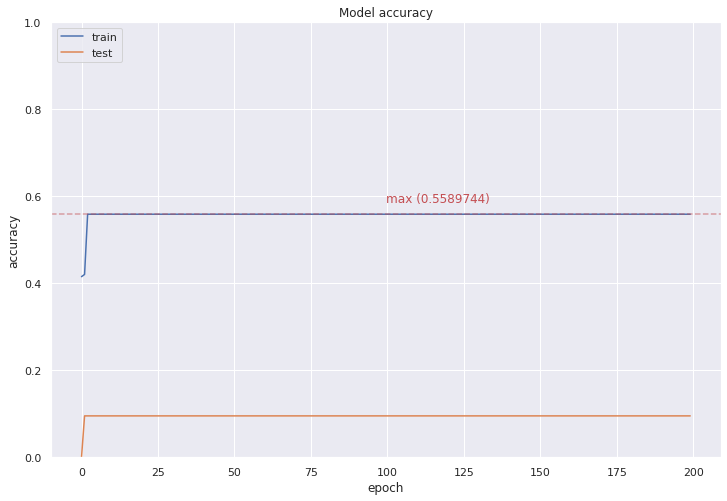

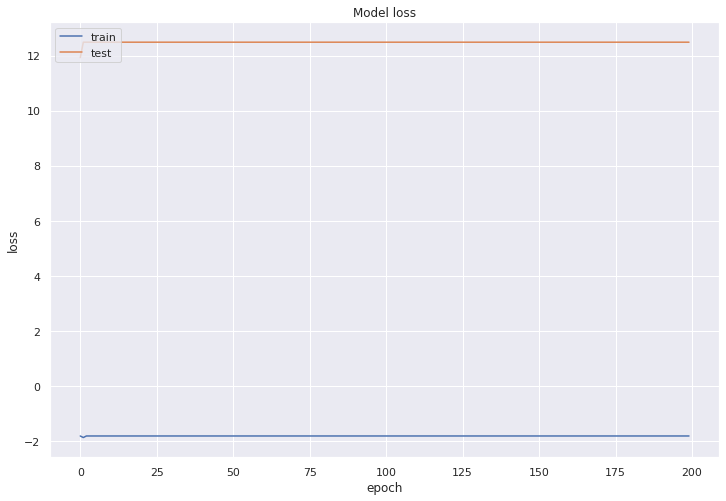


K-Fold:  10
Train on 195 samples, validate on 21 samples
Epoch 1/200
195/195 [==============================] - 1s 6ms/step - loss: -0.0791 - accuracy: 0.5026 - val_loss: -3.6726 - val_accuracy: 0.6190

Epoch 00001: val_accuracy improved from -inf to 0.61905, saving model to best_k_model_activation.pkl
Epoch 2/200
195/195 [==============================] - 0s 1ms/step - loss: -0.0791 - accuracy: 0.5026 - val_loss: -3.6726 - val_accuracy: 0.6190

Epoch 00002: val_accuracy did not improve from 0.61905
Epoch 3/200
195/195 [==============================] - 0s 1ms/step - loss: -0.0791 - accuracy: 0.5026 - val_loss: -3.6726 - val_accuracy: 0.6190

Epoch 00003: val_accuracy did not improve from 0.61905
Epoch 4/200
195/195 [==============================] - 0s 936us/step - loss: -0.0791 - accuracy: 0.5026 - val_loss: -3.6726 - val_accuracy: 0.6190

Epoch 00004: val_accuracy did not improve from 0.61905
Epoch 5/200
195/195 [==============================] - 0s 1ms/step - loss: -0.0791 - accur

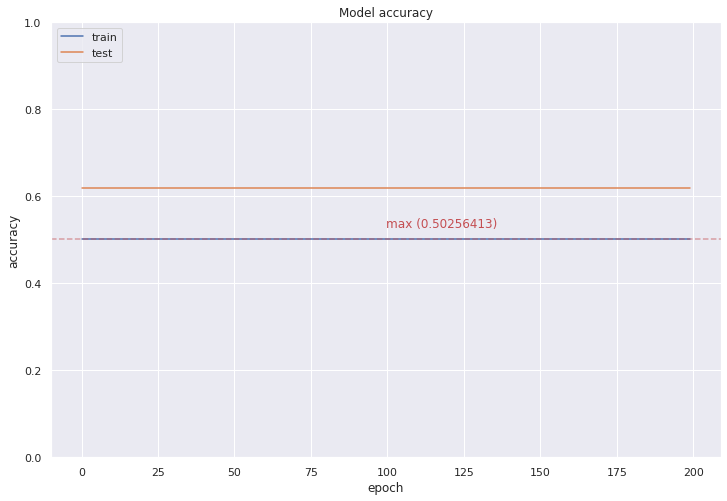

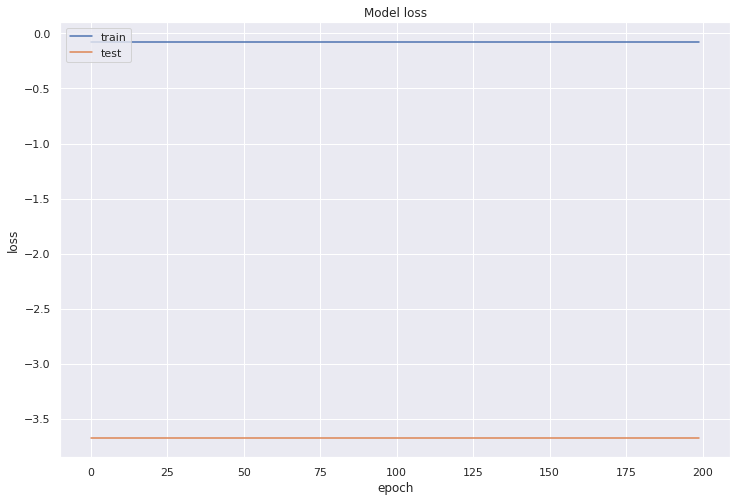

56.23% (+/- 37.57%)


In [0]:
_lstm_k_activation_model = lstm_model(activation_f='tanh')
cvscores_activation_model = k_Fold(_lstm_k_activation_model, 'best_k_model_activation')

#### Accuracy Score Plot in K-Fold Cross Validation for Tanh model

max:  1.0
mean:  0.5623376630246639
std:  0.3960740613535634


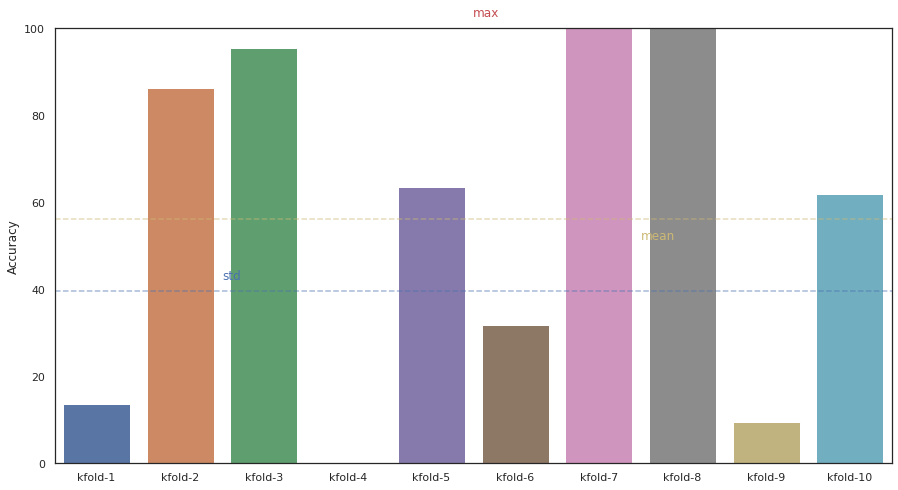

In [0]:
plot_bar_KFold_score(cvscores_activation_model)

### 4.2 Adjusting the Number of Neurons(units)

The learning capacity of the neural network is affected by the **number of neurons** we specify in the **LSTM model**. Typically, the more neurons we add to LSTM, the larger ability to learn the form of the problem. Conversely, the larger number of neurons it has, the higher **impact** in the **training time** it acquires. 



#### Deploying the base model structure with adjustment to the number of neurons in LSTM (Units = 100)

We tuned the neurons to 100 from 256 to observe how the learning capacity is affected.

In [0]:
_lstm_neurons_model = lstm_model(n_neurons = 100)
chk = ModelCheckpoint('best_model_neurons.pkl', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
lstm_neurons_m_history = _lstm_neurons_model.fit(train, train_target, epochs=200, batch_size=128, callbacks=[chk], validation_data=(test,test_target))

#loading the model and calculating accuracy on the test data
_lstm_neurons_model = load_model('best_model_neurons.pkl')
test_preds = _lstm_neurons_model.predict_classes(test)
print('accuracy: > ', accuracy_score(test_target, test_preds))

Train on 136 samples, validate on 34 samples
Epoch 1/200
136/136 [==============================] - 2s 13ms/step - loss: 0.6931 - accuracy: 0.5294 - val_loss: 0.7399 - val_accuracy: 0.2353

Epoch 00001: val_accuracy improved from -inf to 0.23529, saving model to best_model_neurons.pkl
Epoch 2/200
136/136 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.5294 - val_loss: 0.7281 - val_accuracy: 0.1176

Epoch 00002: val_accuracy did not improve from 0.23529
Epoch 3/200
136/136 [==============================] - 0s 1ms/step - loss: 0.6839 - accuracy: 0.5515 - val_loss: 0.7334 - val_accuracy: 0.0882

Epoch 00003: val_accuracy did not improve from 0.23529
Epoch 4/200
136/136 [==============================] - 0s 1ms/step - loss: 0.6792 - accuracy: 0.6176 - val_loss: 0.7391 - val_accuracy: 0.0882

Epoch 00004: val_accuracy did not improve from 0.23529
Epoch 5/200
136/136 [==============================] - 0s 1ms/step - loss: 0.6739 - accuracy: 0.6324 - val_loss: 0.75

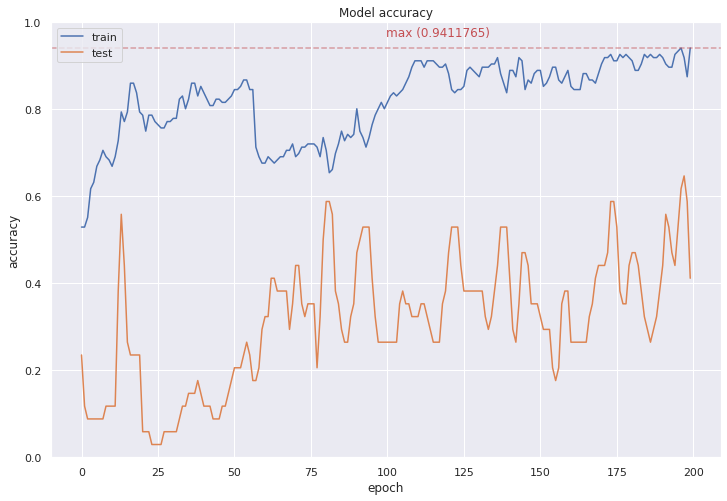

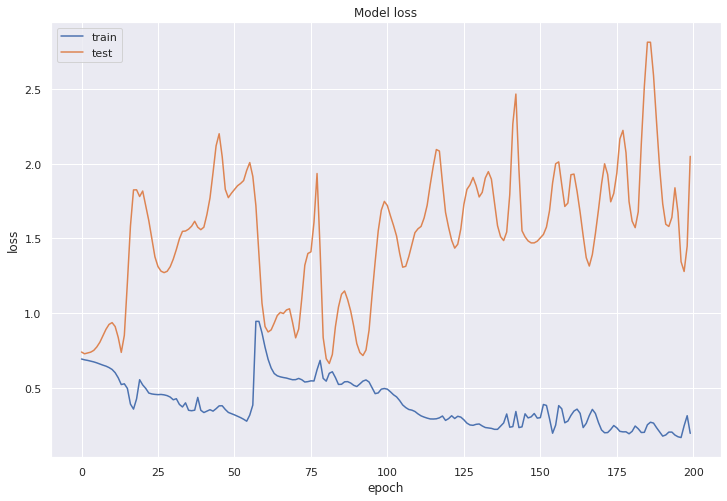

In [0]:
plot_histogram_of_performance(lstm_neurons_m_history)

###10 Fold Validation 



K-Fold:  1
Train on 194 samples, validate on 22 samples
Epoch 1/200
194/194 [==============================] - 2s 9ms/step - loss: 0.6560 - accuracy: 0.1649 - val_loss: 0.6684 - val_accuracy: 0.7727

Epoch 00001: val_accuracy improved from -inf to 0.77273, saving model to best_k_neurons_model.pkl
Epoch 2/200
194/194 [==============================] - 0s 1ms/step - loss: 0.6042 - accuracy: 0.1289 - val_loss: 0.6838 - val_accuracy: 0.5000

Epoch 00002: val_accuracy did not improve from 0.77273
Epoch 3/200
194/194 [==============================] - 0s 1ms/step - loss: 0.5398 - accuracy: 0.1134 - val_loss: 0.7021 - val_accuracy: 0.3182

Epoch 00003: val_accuracy did not improve from 0.77273
Epoch 4/200
194/194 [==============================] - 0s 985us/step - loss: 0.4615 - accuracy: 0.1031 - val_loss: 0.7244 - val_accuracy: 0.3182

Epoch 00004: val_accuracy did not improve from 0.77273
Epoch 5/200
194/194 [==============================] - 0s 987us/step - loss: 0.3415 - accuracy: 0.0825

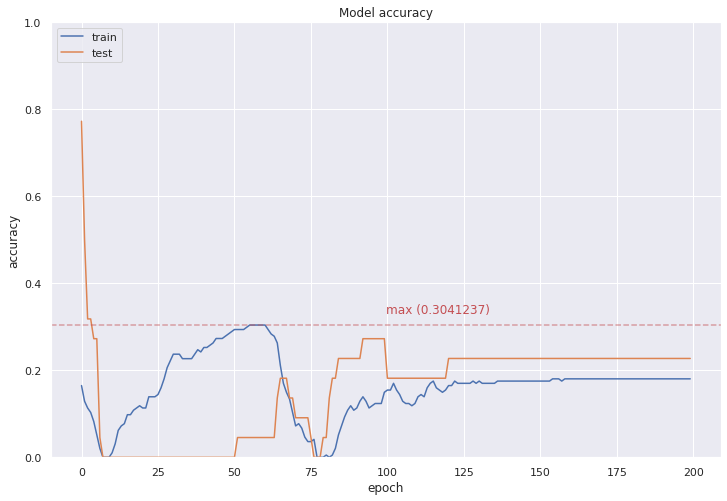

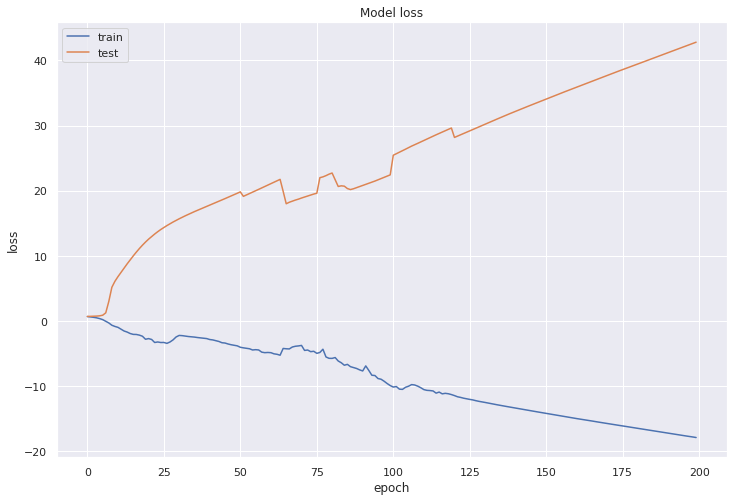


K-Fold:  2
Train on 194 samples, validate on 22 samples
Epoch 1/200
194/194 [==============================] - 1s 6ms/step - loss: 0.6121 - accuracy: 0.2165 - val_loss: 0.5291 - val_accuracy: 0.0909

Epoch 00001: val_accuracy improved from -inf to 0.09091, saving model to best_k_neurons_model.pkl
Epoch 2/200
194/194 [==============================] - 0s 867us/step - loss: 0.5592 - accuracy: 0.1753 - val_loss: 0.4668 - val_accuracy: 0.0909

Epoch 00002: val_accuracy did not improve from 0.09091
Epoch 3/200
194/194 [==============================] - 0s 884us/step - loss: 0.4920 - accuracy: 0.1649 - val_loss: 0.4048 - val_accuracy: 0.0909

Epoch 00003: val_accuracy did not improve from 0.09091
Epoch 4/200
194/194 [==============================] - 0s 876us/step - loss: 0.3825 - accuracy: 0.1649 - val_loss: 0.3244 - val_accuracy: 0.0909

Epoch 00004: val_accuracy did not improve from 0.09091
Epoch 5/200
194/194 [==============================] - 0s 943us/step - loss: 0.2525 - accuracy: 0.

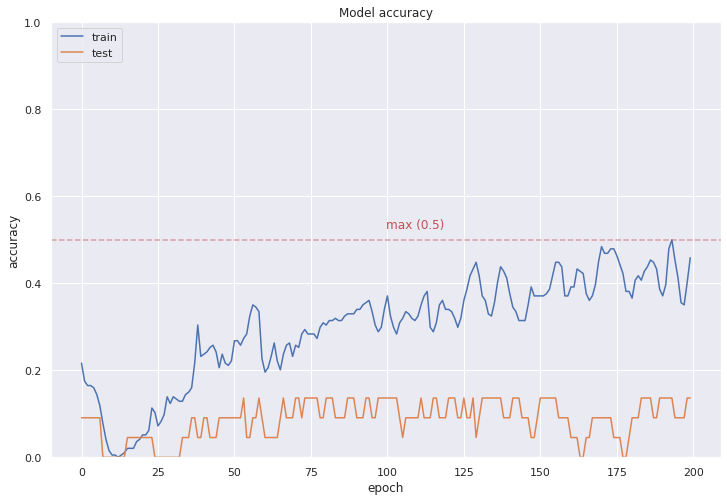

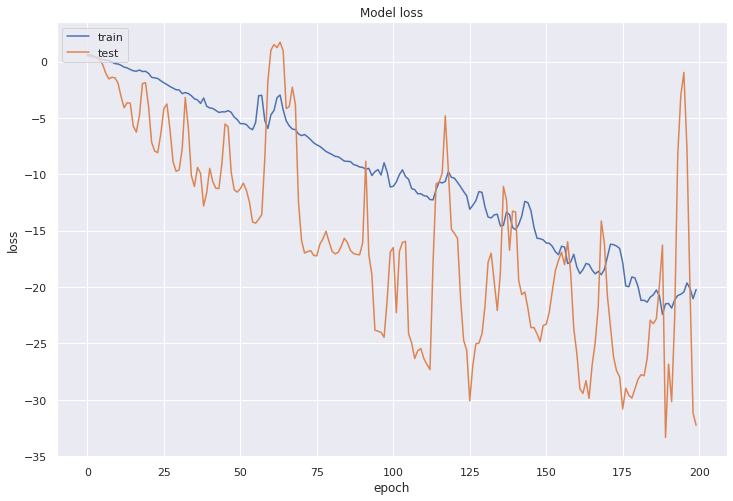


K-Fold:  3
Train on 194 samples, validate on 22 samples
Epoch 1/200
194/194 [==============================] - 1s 6ms/step - loss: -5.1239 - accuracy: 0.2938 - val_loss: -18.1972 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to best_k_neurons_model.pkl
Epoch 2/200
194/194 [==============================] - 0s 894us/step - loss: -5.8449 - accuracy: 0.3041 - val_loss: -16.4151 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/200
194/194 [==============================] - 0s 932us/step - loss: -6.4348 - accuracy: 0.3093 - val_loss: -10.5735 - val_accuracy: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.00000
Epoch 4/200
194/194 [==============================] - 0s 911us/step - loss: -6.4196 - accuracy: 0.3351 - val_loss: -9.6412 - val_accuracy: 0.0455

Epoch 00004: val_accuracy improved from 0.00000 to 0.04545, saving model to best_k_neurons_model.pkl
Epoch 5/200
194/194 [========

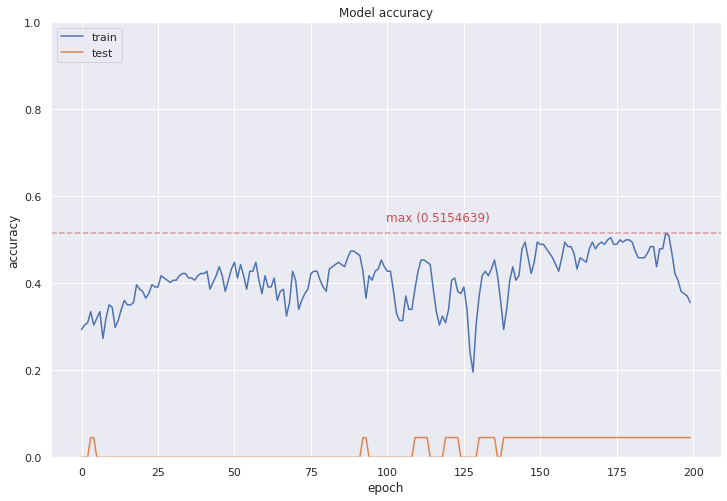

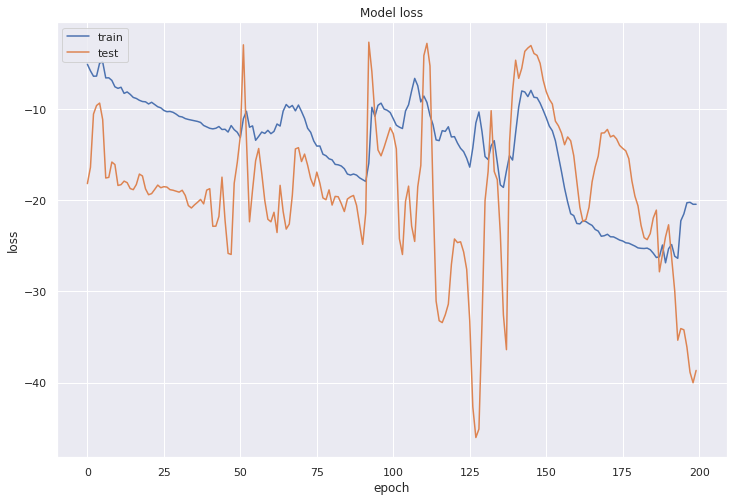


K-Fold:  4
Train on 194 samples, validate on 22 samples
Epoch 1/200
194/194 [==============================] - 1s 6ms/step - loss: -6.4283 - accuracy: 0.2268 - val_loss: 1.5194 - val_accuracy: 0.8636

Epoch 00001: val_accuracy improved from -inf to 0.86364, saving model to best_k_neurons_model.pkl
Epoch 2/200
194/194 [==============================] - 0s 922us/step - loss: -6.7009 - accuracy: 0.2216 - val_loss: 2.4856 - val_accuracy: 0.8182

Epoch 00002: val_accuracy did not improve from 0.86364
Epoch 3/200
194/194 [==============================] - 0s 940us/step - loss: -8.2343 - accuracy: 0.2423 - val_loss: 14.2899 - val_accuracy: 0.2273

Epoch 00003: val_accuracy did not improve from 0.86364
Epoch 4/200
194/194 [==============================] - 0s 896us/step - loss: -9.2136 - accuracy: 0.2113 - val_loss: 20.1118 - val_accuracy: 0.0000e+00

Epoch 00004: val_accuracy did not improve from 0.86364
Epoch 5/200
194/194 [==============================] - 0s 869us/step - loss: -9.3441 - a

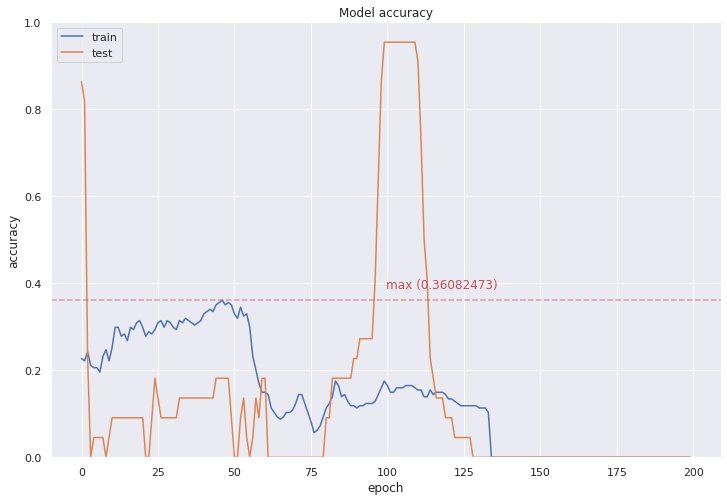

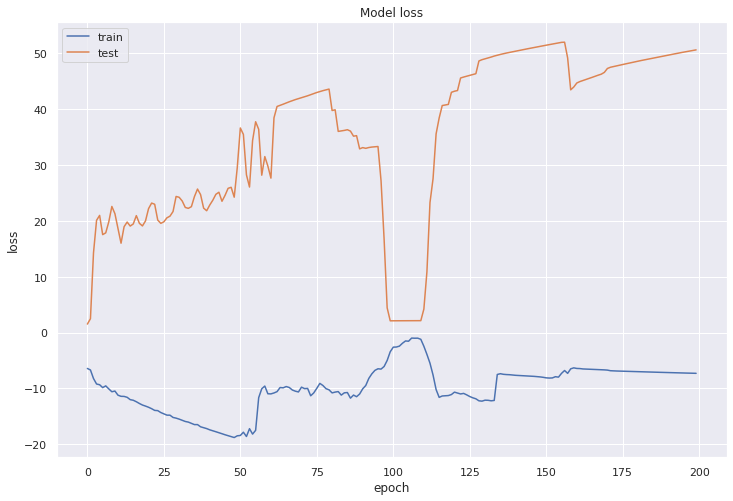


K-Fold:  5
Train on 194 samples, validate on 22 samples
Epoch 1/200
194/194 [==============================] - 1s 6ms/step - loss: -2.1974 - accuracy: 0.2320 - val_loss: -1.5718 - val_accuracy: 0.3182

Epoch 00001: val_accuracy improved from -inf to 0.31818, saving model to best_k_neurons_model.pkl
Epoch 2/200
194/194 [==============================] - 0s 924us/step - loss: -2.1510 - accuracy: 0.2216 - val_loss: -1.4065 - val_accuracy: 0.3182

Epoch 00002: val_accuracy did not improve from 0.31818
Epoch 3/200
194/194 [==============================] - 0s 956us/step - loss: -2.0252 - accuracy: 0.2216 - val_loss: -1.6821 - val_accuracy: 0.3182

Epoch 00003: val_accuracy did not improve from 0.31818
Epoch 4/200
194/194 [==============================] - 0s 965us/step - loss: -1.3045 - accuracy: 0.2216 - val_loss: -1.8037 - val_accuracy: 0.3636

Epoch 00004: val_accuracy improved from 0.31818 to 0.36364, saving model to best_k_neurons_model.pkl
Epoch 5/200
194/194 [=======================

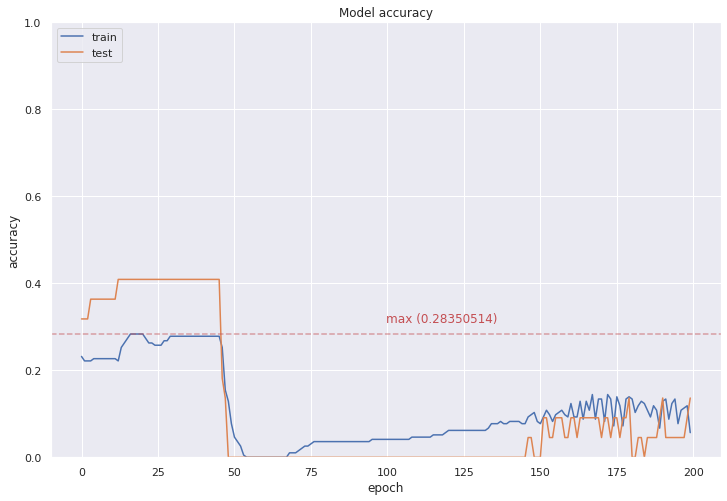

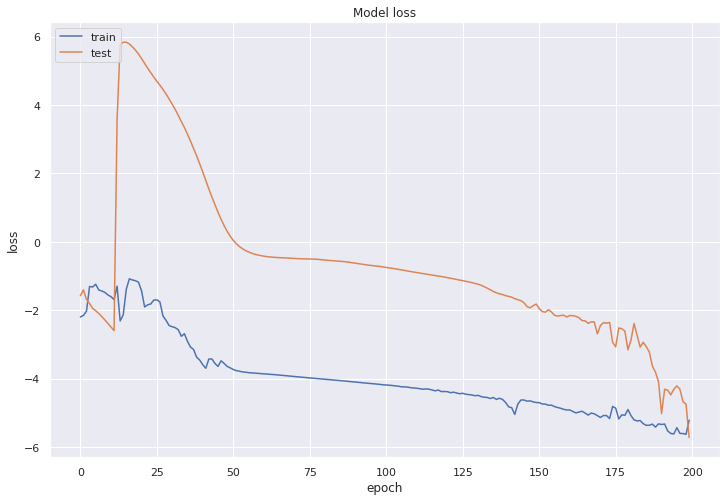


K-Fold:  6
Train on 194 samples, validate on 22 samples
Epoch 1/200
194/194 [==============================] - 1s 6ms/step - loss: -3.3628 - accuracy: 0.2320 - val_loss: 11.1133 - val_accuracy: 0.6364

Epoch 00001: val_accuracy improved from -inf to 0.63636, saving model to best_k_neurons_model.pkl
Epoch 2/200
194/194 [==============================] - 0s 959us/step - loss: -2.1841 - accuracy: 0.2371 - val_loss: 11.1137 - val_accuracy: 0.6364

Epoch 00002: val_accuracy did not improve from 0.63636
Epoch 3/200
194/194 [==============================] - 0s 928us/step - loss: -2.5259 - accuracy: 0.2423 - val_loss: 13.6862 - val_accuracy: 0.6364

Epoch 00003: val_accuracy did not improve from 0.63636
Epoch 4/200
194/194 [==============================] - 0s 924us/step - loss: -2.1458 - accuracy: 0.2577 - val_loss: 11.5556 - val_accuracy: 0.6818

Epoch 00004: val_accuracy improved from 0.63636 to 0.68182, saving model to best_k_neurons_model.pkl
Epoch 5/200
194/194 [=======================

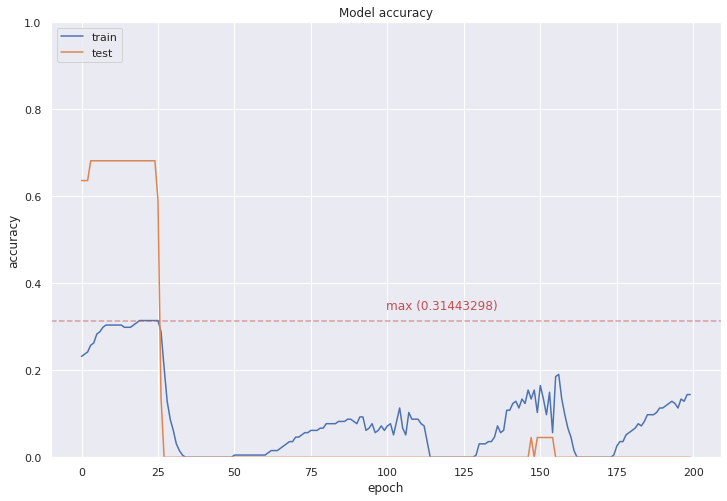

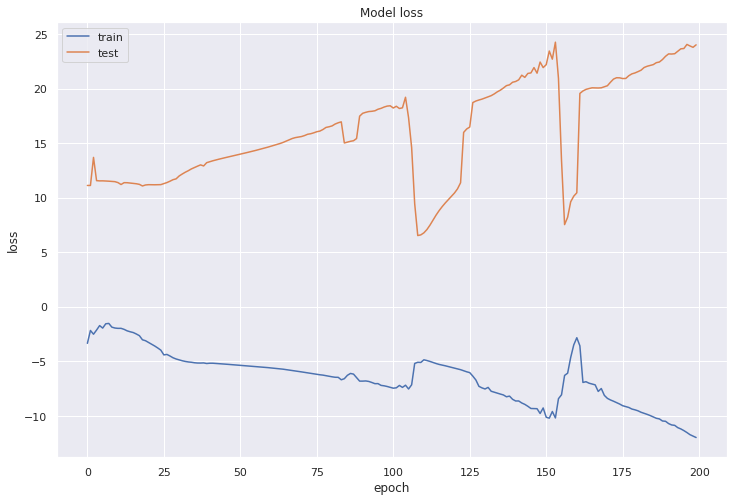


K-Fold:  7
Train on 195 samples, validate on 21 samples
Epoch 1/200
195/195 [==============================] - 1s 6ms/step - loss: -0.5423 - accuracy: 0.3436 - val_loss: 1.4538 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to best_k_neurons_model.pkl
Epoch 2/200
195/195 [==============================] - 0s 838us/step - loss: -0.5231 - accuracy: 0.3590 - val_loss: 1.3159 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/200
195/195 [==============================] - 0s 917us/step - loss: -0.8368 - accuracy: 0.3641 - val_loss: 6.5315 - val_accuracy: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.00000
Epoch 4/200
195/195 [==============================] - 0s 849us/step - loss: -1.1785 - accuracy: 0.3744 - val_loss: 6.3974 - val_accuracy: 0.0000e+00

Epoch 00004: val_accuracy did not improve from 0.00000
Epoch 5/200
195/195 [==============================] - 0s 870us/step - loss: -

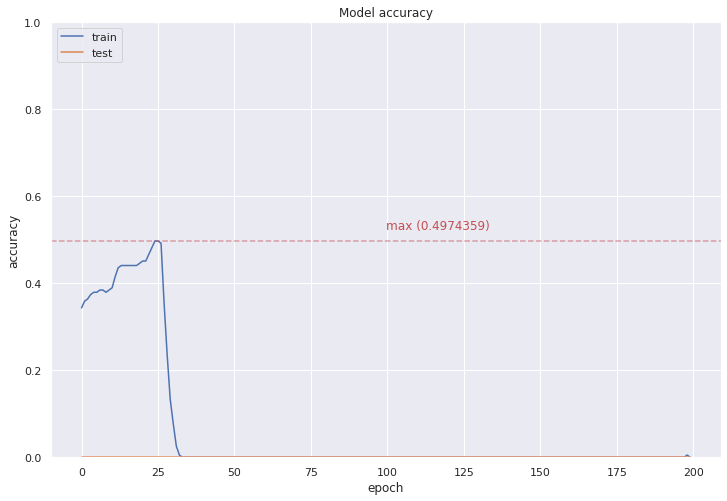

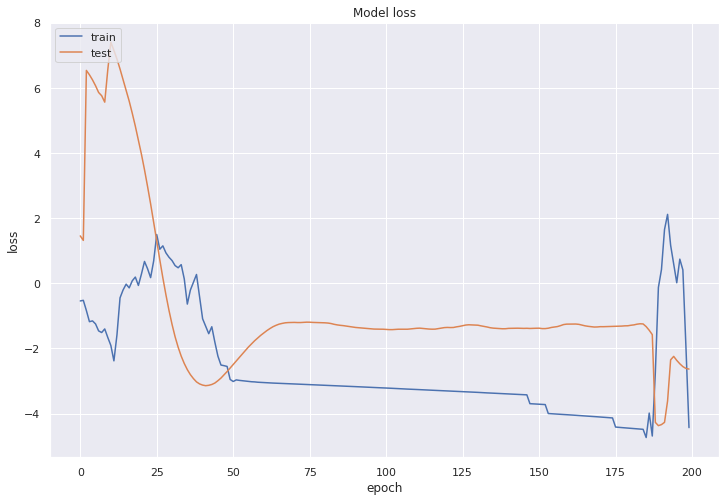


K-Fold:  8
Train on 195 samples, validate on 21 samples
Epoch 1/200
195/195 [==============================] - 1s 7ms/step - loss: 0.1241 - accuracy: 0.3590 - val_loss: -4.6566 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to best_k_neurons_model.pkl
Epoch 2/200
195/195 [==============================] - 0s 886us/step - loss: -0.0693 - accuracy: 0.3641 - val_loss: -6.6140 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/200
195/195 [==============================] - 0s 873us/step - loss: -0.4979 - accuracy: 0.3692 - val_loss: -3.6864 - val_accuracy: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.00000
Epoch 4/200
195/195 [==============================] - 0s 858us/step - loss: -1.3351 - accuracy: 0.3538 - val_loss: -3.3425 - val_accuracy: 0.0000e+00

Epoch 00004: val_accuracy did not improve from 0.00000
Epoch 5/200
195/195 [==============================] - 0s 1ms/step - loss: 

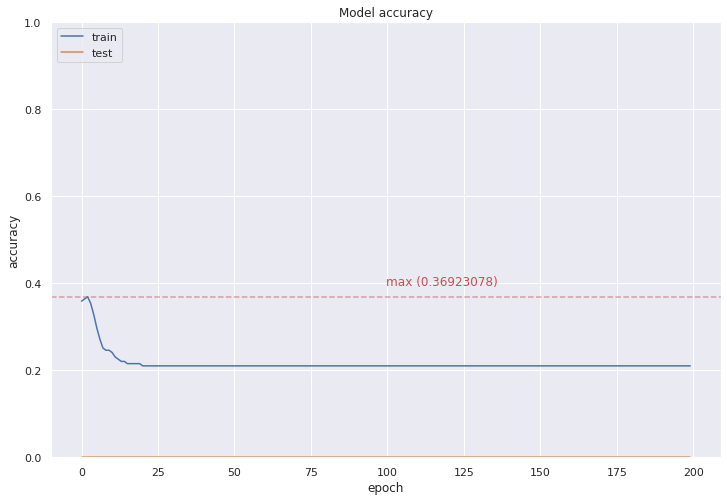

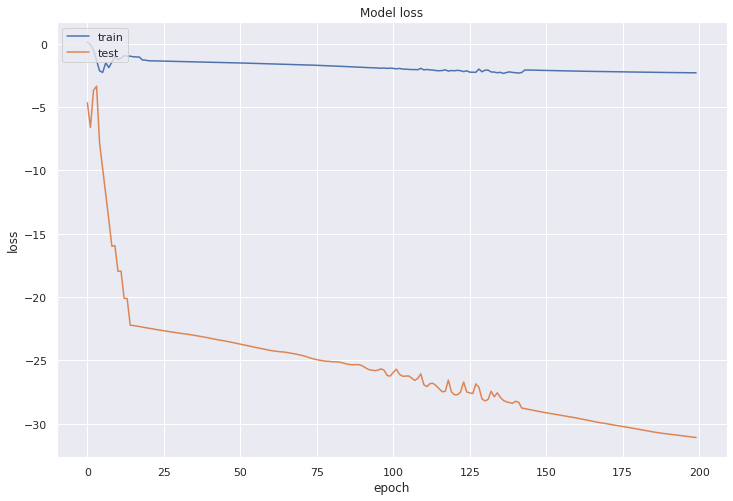


K-Fold:  9
Train on 195 samples, validate on 21 samples
Epoch 1/200
195/195 [==============================] - 1s 7ms/step - loss: -1.5546 - accuracy: 0.2923 - val_loss: 5.1090 - val_accuracy: 0.6667

Epoch 00001: val_accuracy improved from -inf to 0.66667, saving model to best_k_neurons_model.pkl
Epoch 2/200
195/195 [==============================] - 0s 1ms/step - loss: -1.0615 - accuracy: 0.2923 - val_loss: 2.7324 - val_accuracy: 0.7619

Epoch 00002: val_accuracy improved from 0.66667 to 0.76190, saving model to best_k_neurons_model.pkl
Epoch 3/200
195/195 [==============================] - 0s 910us/step - loss: -0.8227 - accuracy: 0.2923 - val_loss: 2.6923 - val_accuracy: 0.7619

Epoch 00003: val_accuracy did not improve from 0.76190
Epoch 4/200
195/195 [==============================] - 0s 847us/step - loss: -0.9504 - accuracy: 0.2923 - val_loss: 2.6884 - val_accuracy: 0.8095

Epoch 00004: val_accuracy improved from 0.76190 to 0.80952, saving model to best_k_neurons_model.pkl
Epoc

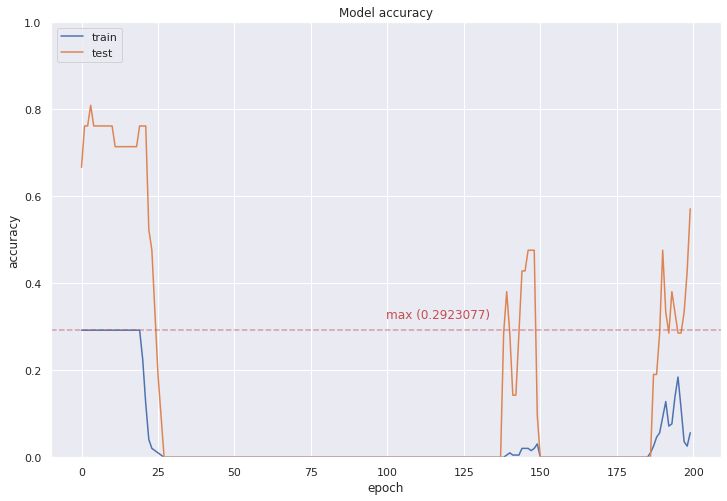

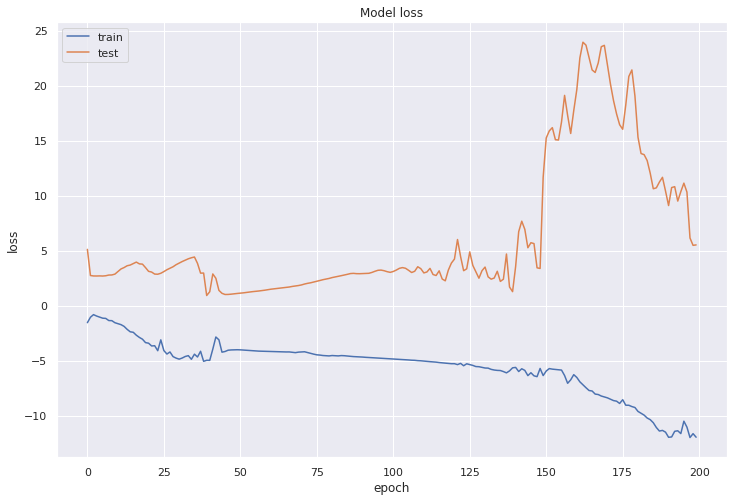


K-Fold:  10
Train on 195 samples, validate on 21 samples
Epoch 1/200
195/195 [==============================] - 1s 7ms/step - loss: 2.0341 - accuracy: 0.3385 - val_loss: -25.6159 - val_accuracy: 0.3810

Epoch 00001: val_accuracy improved from -inf to 0.38095, saving model to best_k_neurons_model.pkl
Epoch 2/200
195/195 [==============================] - 0s 941us/step - loss: 1.9369 - accuracy: 0.3385 - val_loss: -25.1452 - val_accuracy: 0.3810

Epoch 00002: val_accuracy did not improve from 0.38095
Epoch 3/200
195/195 [==============================] - 0s 862us/step - loss: 1.8309 - accuracy: 0.3333 - val_loss: -25.6672 - val_accuracy: 0.3810

Epoch 00003: val_accuracy did not improve from 0.38095
Epoch 4/200
195/195 [==============================] - 0s 952us/step - loss: 1.7217 - accuracy: 0.3333 - val_loss: -25.5210 - val_accuracy: 0.3810

Epoch 00004: val_accuracy did not improve from 0.38095
Epoch 5/200
195/195 [==============================] - 0s 875us/step - loss: 1.5892 - acc

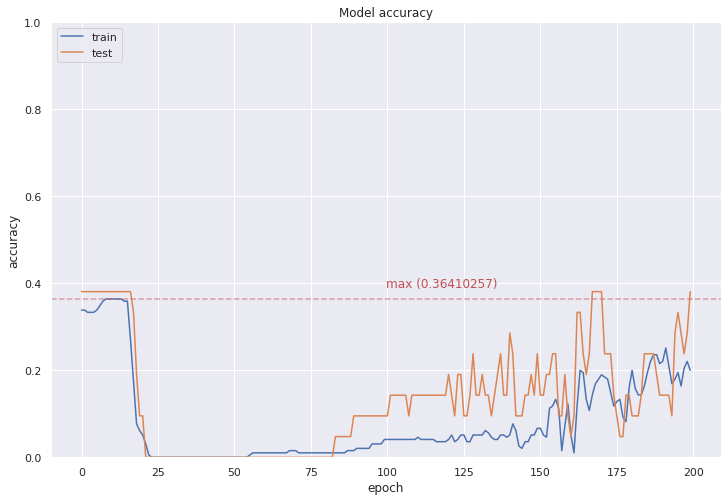

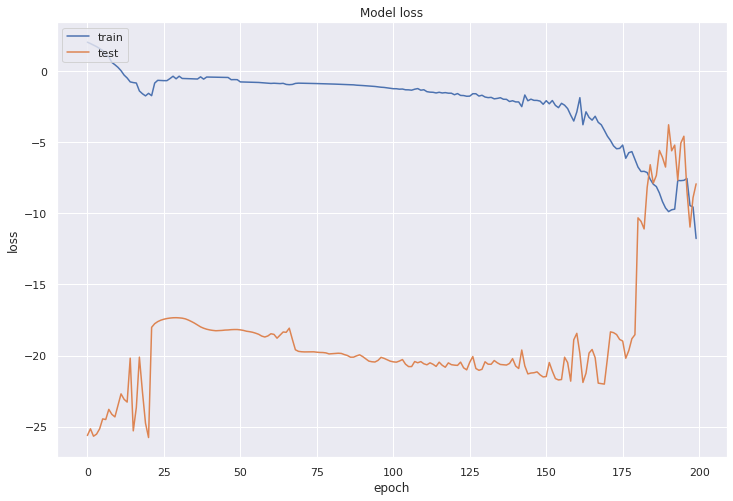

41.90% (+/- 34.72%)


In [0]:
_lstm_k_neurons_model = lstm_model(n_neurons = 100)
cvscores_neurons_model = k_Fold(_lstm_k_neurons_model, 'best_k_neurons_model')

#### Accuracy Score Plot in K-Fold Cross Validation for neurons model

max:  0.9545454382896423
mean:  0.4190476179122925
std:  0.3659996120844792


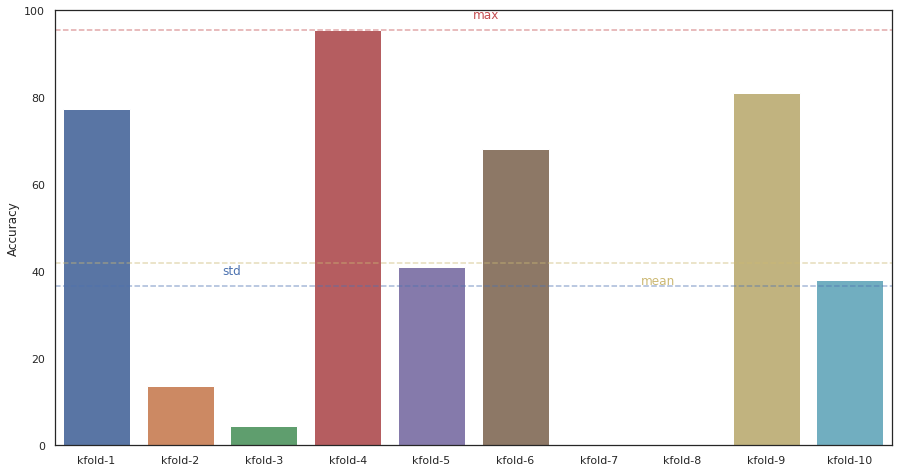

In [0]:
plot_bar_KFold_score(cvscores_neurons_model)

### 4.3 Adjusting the weights of the network(batch size)

The **LSTM** network updates its weights based on the **batch size** **hyperparameter**. A good tactic is to specify the size of the batch in accordance with size of the training dataset and test set. For this tuning, we will observe how the accuracy of the base model is affected by **increasing** the size of each update on the weights the **LSTM** performs.



#### Deploying the base model structure with adjustment to the size of batch in LSTM(batch_size=200)

In [0]:
_lstm_batch_size_model = lstm_model()
chk = ModelCheckpoint('best_model_batch_size.pkl', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
lstm_batch_size_m_history = _lstm_batch_size_model.fit(train, train_target, epochs=200, batch_size=200, callbacks=[chk], validation_data=(test,test_target))

#loading the model and calculating accuracy on the test data
_lstm_batch_size_model = load_model('best_model_batch_size.pkl')
test_preds = _lstm_batch_size_model.predict_classes(test)
print('accuracy: > ', accuracy_score(test_target, test_preds))

Train on 136 samples, validate on 34 samples
Epoch 1/200
136/136 [==============================] - 2s 17ms/step - loss: 0.6925 - accuracy: 0.5515 - val_loss: 0.7447 - val_accuracy: 0.2647

Epoch 00001: val_accuracy improved from -inf to 0.26471, saving model to best_model_batch_size.pkl
Epoch 2/200
136/136 [==============================] - 0s 963us/step - loss: 0.6784 - accuracy: 0.6250 - val_loss: 0.7730 - val_accuracy: 0.3235

Epoch 00002: val_accuracy improved from 0.26471 to 0.32353, saving model to best_model_batch_size.pkl
Epoch 3/200
136/136 [==============================] - 0s 852us/step - loss: 0.6649 - accuracy: 0.6324 - val_loss: 0.7944 - val_accuracy: 0.1765

Epoch 00003: val_accuracy did not improve from 0.32353
Epoch 4/200
136/136 [==============================] - 0s 921us/step - loss: 0.6485 - accuracy: 0.6397 - val_loss: 0.8133 - val_accuracy: 0.1765

Epoch 00004: val_accuracy did not improve from 0.32353
Epoch 5/200
136/136 [==============================] - 0s 910

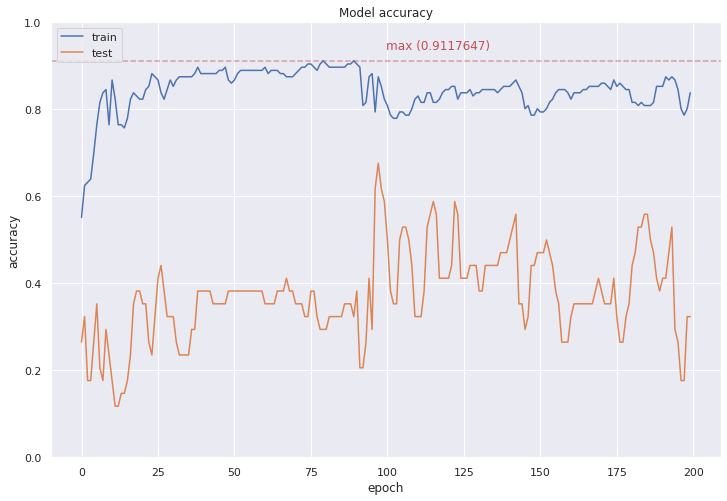

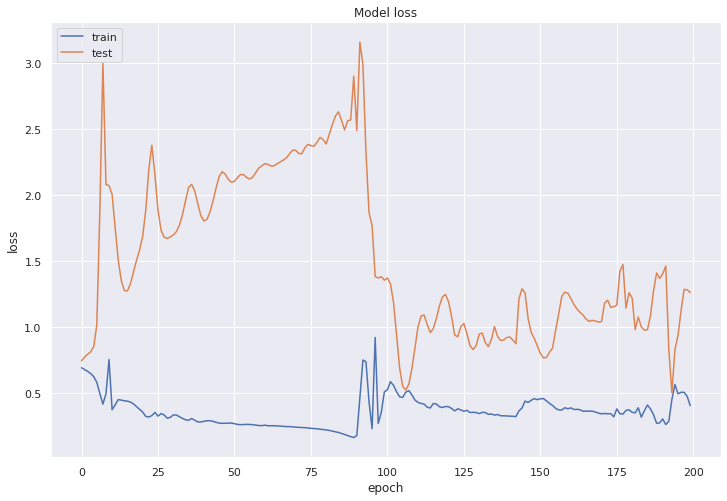

In [0]:
plot_histogram_of_performance(lstm_batch_size_m_history)

###10 Fold Validation 



K-Fold:  1
Train on 194 samples, validate on 22 samples
Epoch 1/200
194/194 [==============================] - 2s 12ms/step - loss: 0.7122 - accuracy: 0.2887 - val_loss: 0.7117 - val_accuracy: 0.3636

Epoch 00001: val_accuracy improved from -inf to 0.36364, saving model to best_k_batch_size_model.pkl
Epoch 2/200
194/194 [==============================] - 0s 625us/step - loss: 0.6402 - accuracy: 0.0000e+00 - val_loss: 0.7151 - val_accuracy: 0.4091

Epoch 00002: val_accuracy improved from 0.36364 to 0.40909, saving model to best_k_batch_size_model.pkl
Epoch 3/200
194/194 [==============================] - 0s 619us/step - loss: 0.5660 - accuracy: 0.0464 - val_loss: 0.7283 - val_accuracy: 0.4091

Epoch 00003: val_accuracy did not improve from 0.40909
Epoch 4/200
194/194 [==============================] - 0s 676us/step - loss: 0.4723 - accuracy: 0.0567 - val_loss: 0.7653 - val_accuracy: 0.3182

Epoch 00004: val_accuracy did not improve from 0.40909
Epoch 5/200
194/194 [====================

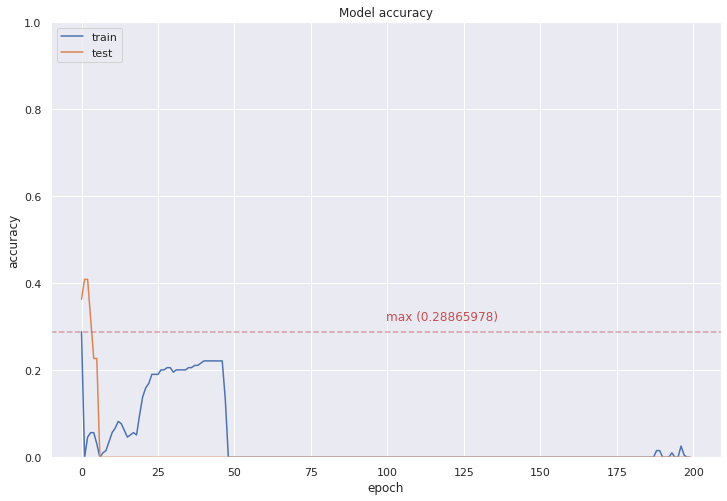

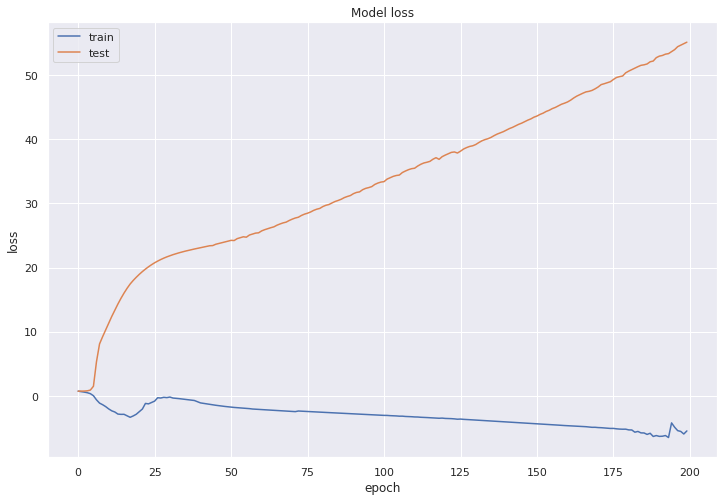


K-Fold:  2
Train on 194 samples, validate on 22 samples
Epoch 1/200
194/194 [==============================] - 1s 7ms/step - loss: 0.5993 - accuracy: 0.0928 - val_loss: 0.2822 - val_accuracy: 0.0455

Epoch 00001: val_accuracy improved from -inf to 0.04545, saving model to best_k_batch_size_model.pkl
Epoch 2/200
194/194 [==============================] - 0s 664us/step - loss: 0.5281 - accuracy: 0.1237 - val_loss: 0.0870 - val_accuracy: 0.0455

Epoch 00002: val_accuracy did not improve from 0.04545
Epoch 3/200
194/194 [==============================] - 0s 709us/step - loss: 0.4231 - accuracy: 0.1443 - val_loss: -0.3216 - val_accuracy: 0.0455

Epoch 00003: val_accuracy did not improve from 0.04545
Epoch 4/200
194/194 [==============================] - 0s 699us/step - loss: 0.2324 - accuracy: 0.1186 - val_loss: -1.6249 - val_accuracy: 0.0455

Epoch 00004: val_accuracy did not improve from 0.04545
Epoch 5/200
194/194 [==============================] - 0s 762us/step - loss: -0.0023 - accura

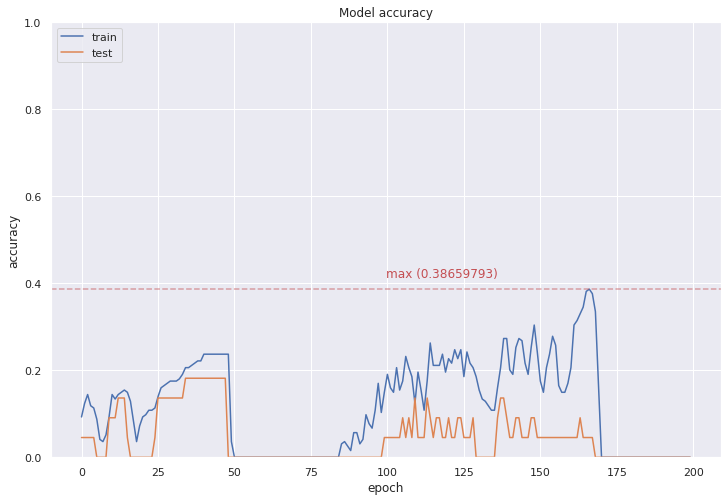

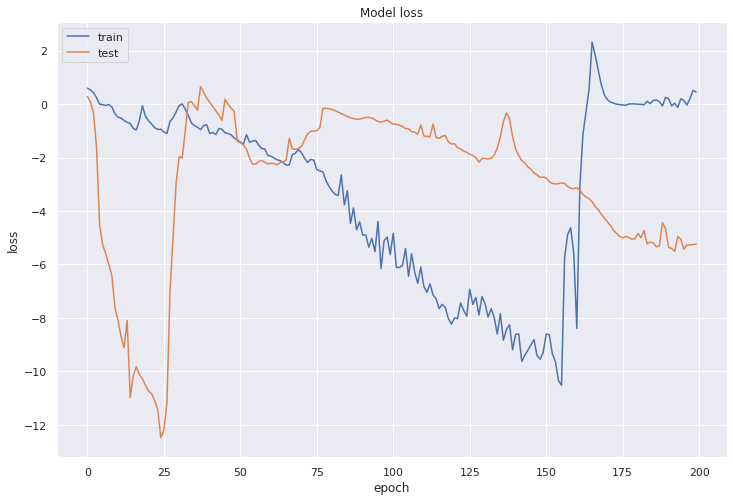


K-Fold:  3
Train on 194 samples, validate on 22 samples
Epoch 1/200
194/194 [==============================] - 1s 7ms/step - loss: 1.1149 - accuracy: 0.2268 - val_loss: -16.8765 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to best_k_batch_size_model.pkl
Epoch 2/200
194/194 [==============================] - 0s 716us/step - loss: 1.0636 - accuracy: 0.2320 - val_loss: -16.6240 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/200
194/194 [==============================] - 0s 714us/step - loss: 0.9233 - accuracy: 0.2371 - val_loss: -15.3596 - val_accuracy: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.00000
Epoch 4/200
194/194 [==============================] - 0s 619us/step - loss: 0.8680 - accuracy: 0.2423 - val_loss: -15.1754 - val_accuracy: 0.0000e+00

Epoch 00004: val_accuracy did not improve from 0.00000
Epoch 5/200
194/194 [==============================] - 0s 594us/step - 

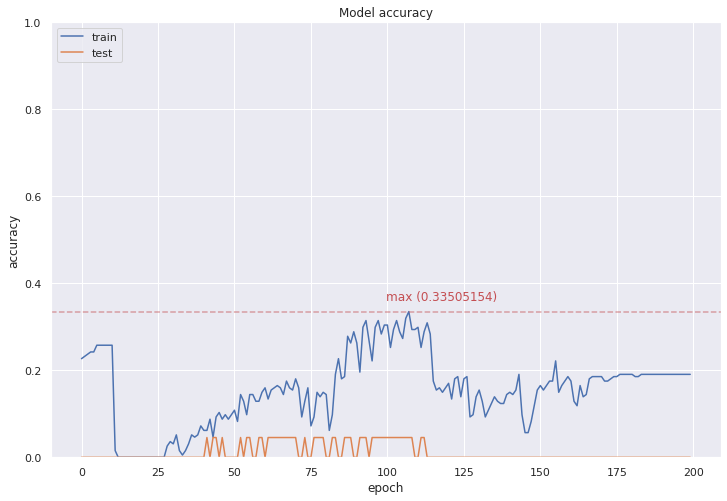

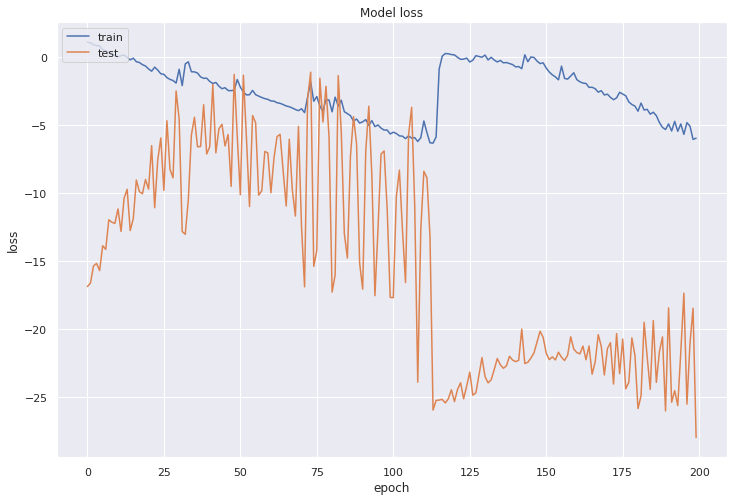


K-Fold:  4
Train on 194 samples, validate on 22 samples
Epoch 1/200
194/194 [==============================] - 1s 7ms/step - loss: -2.6967 - accuracy: 0.0464 - val_loss: 17.8925 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to best_k_batch_size_model.pkl
Epoch 2/200
194/194 [==============================] - 0s 648us/step - loss: -4.2330 - accuracy: 0.0258 - val_loss: 18.6760 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/200
194/194 [==============================] - 0s 615us/step - loss: -4.0214 - accuracy: 0.0258 - val_loss: 18.5739 - val_accuracy: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.00000
Epoch 4/200
194/194 [==============================] - 0s 635us/step - loss: -4.2731 - accuracy: 0.0361 - val_loss: 16.4828 - val_accuracy: 0.0000e+00

Epoch 00004: val_accuracy did not improve from 0.00000
Epoch 5/200
194/194 [==============================] - 0s 650us/step - 

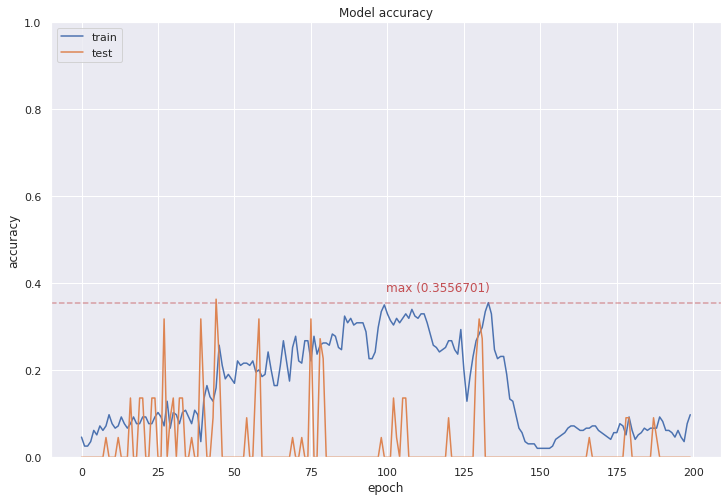

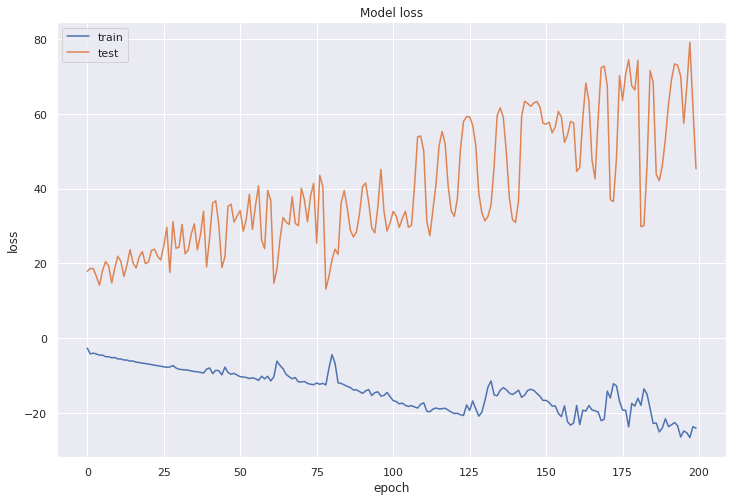


K-Fold:  5
Train on 194 samples, validate on 22 samples
Epoch 1/200
194/194 [==============================] - 1s 7ms/step - loss: -3.3590 - accuracy: 0.2629 - val_loss: -19.7527 - val_accuracy: 0.2727

Epoch 00001: val_accuracy improved from -inf to 0.27273, saving model to best_k_batch_size_model.pkl
Epoch 2/200
194/194 [==============================] - 0s 644us/step - loss: -4.1906 - accuracy: 0.1907 - val_loss: -16.2208 - val_accuracy: 0.2273

Epoch 00002: val_accuracy did not improve from 0.27273
Epoch 3/200
194/194 [==============================] - 0s 674us/step - loss: -3.8987 - accuracy: 0.1598 - val_loss: -16.9870 - val_accuracy: 0.2273

Epoch 00003: val_accuracy did not improve from 0.27273
Epoch 4/200
194/194 [==============================] - 0s 610us/step - loss: -3.9486 - accuracy: 0.1804 - val_loss: -18.5400 - val_accuracy: 0.2273

Epoch 00004: val_accuracy did not improve from 0.27273
Epoch 5/200
194/194 [==============================] - 0s 673us/step - loss: -4.418

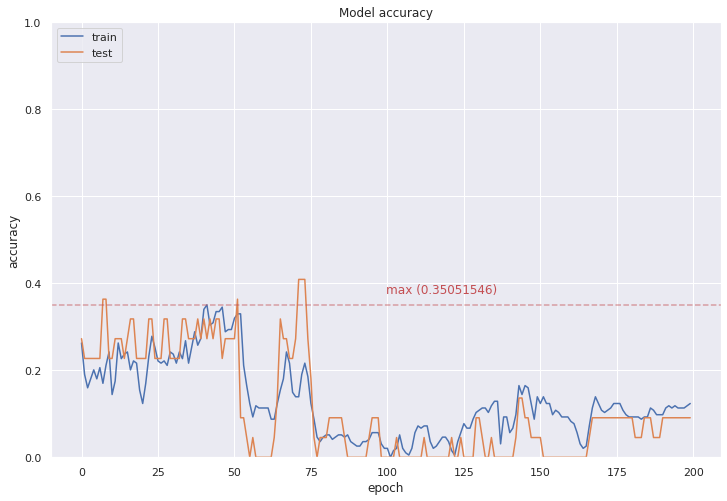

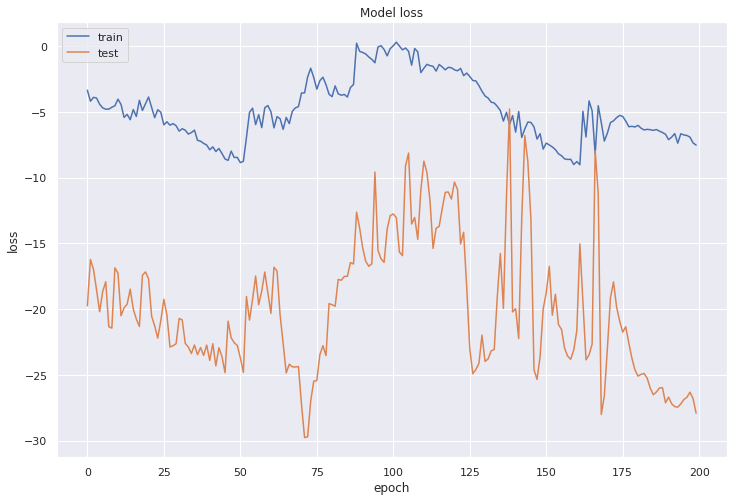


K-Fold:  6
Train on 194 samples, validate on 22 samples
Epoch 1/200
194/194 [==============================] - 1s 7ms/step - loss: -5.8597 - accuracy: 0.1546 - val_loss: 0.8641 - val_accuracy: 0.7727

Epoch 00001: val_accuracy improved from -inf to 0.77273, saving model to best_k_batch_size_model.pkl
Epoch 2/200
194/194 [==============================] - 0s 612us/step - loss: -5.3805 - accuracy: 0.1753 - val_loss: 2.6025 - val_accuracy: 0.6818

Epoch 00002: val_accuracy did not improve from 0.77273
Epoch 3/200
194/194 [==============================] - 0s 647us/step - loss: -5.9136 - accuracy: 0.1546 - val_loss: 5.4037 - val_accuracy: 0.4545

Epoch 00003: val_accuracy did not improve from 0.77273
Epoch 4/200
194/194 [==============================] - 0s 618us/step - loss: -6.7909 - accuracy: 0.0928 - val_loss: 6.8488 - val_accuracy: 0.1818

Epoch 00004: val_accuracy did not improve from 0.77273
Epoch 5/200
194/194 [==============================] - 0s 663us/step - loss: -6.0463 - accu

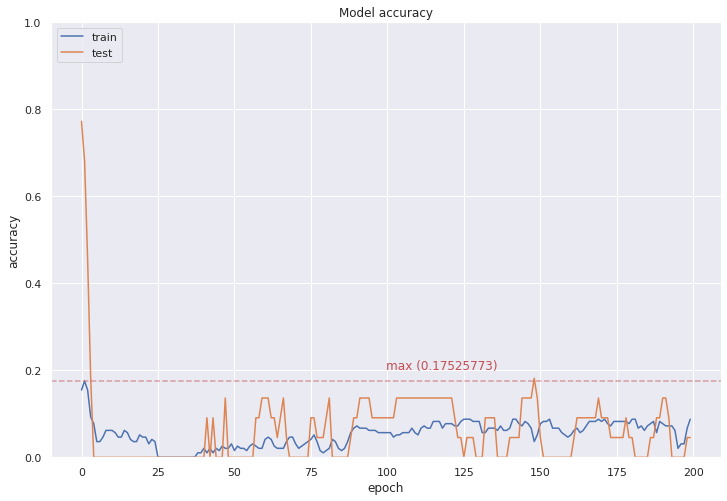

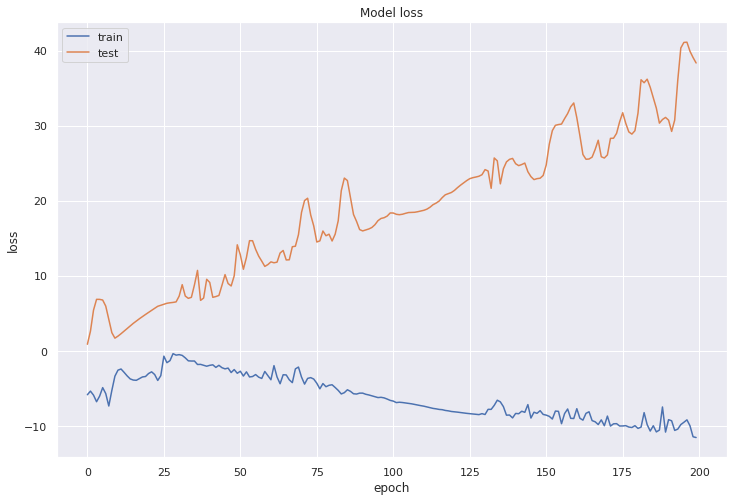


K-Fold:  7
Train on 195 samples, validate on 21 samples
Epoch 1/200
195/195 [==============================] - 2s 8ms/step - loss: -5.0915 - accuracy: 0.2615 - val_loss: -2.2530 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to best_k_batch_size_model.pkl
Epoch 2/200
195/195 [==============================] - 0s 613us/step - loss: -5.2954 - accuracy: 0.2308 - val_loss: -2.8546 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/200
195/195 [==============================] - 0s 645us/step - loss: -5.9320 - accuracy: 0.1897 - val_loss: -3.1649 - val_accuracy: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.00000
Epoch 4/200
195/195 [==============================] - 0s 691us/step - loss: -5.6167 - accuracy: 0.1744 - val_loss: -3.2179 - val_accuracy: 0.0000e+00

Epoch 00004: val_accuracy did not improve from 0.00000
Epoch 5/200
195/195 [==============================] - 0s 592us/step - 

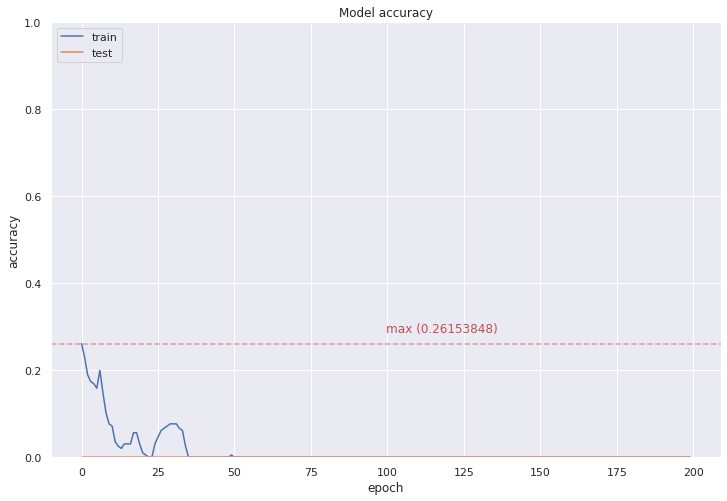

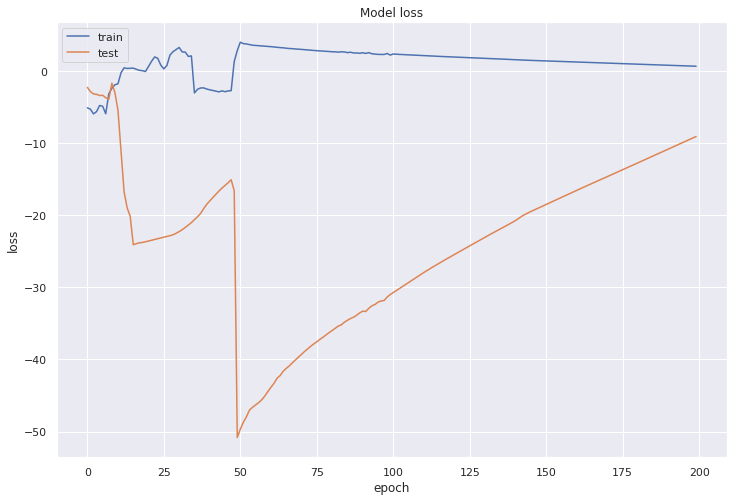


K-Fold:  8
Train on 195 samples, validate on 21 samples
Epoch 1/200
195/195 [==============================] - 2s 8ms/step - loss: -3.7022 - accuracy: 0.2308 - val_loss: -21.3240 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to best_k_batch_size_model.pkl
Epoch 2/200
195/195 [==============================] - 0s 658us/step - loss: -3.9550 - accuracy: 0.1897 - val_loss: -22.4176 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/200
195/195 [==============================] - 0s 648us/step - loss: -3.6205 - accuracy: 0.1590 - val_loss: -18.9536 - val_accuracy: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.00000
Epoch 4/200
195/195 [==============================] - 0s 680us/step - loss: -3.6755 - accuracy: 0.1436 - val_loss: -15.2713 - val_accuracy: 0.0000e+00

Epoch 00004: val_accuracy did not improve from 0.00000
Epoch 5/200
195/195 [==============================] - 0s 647us/ste

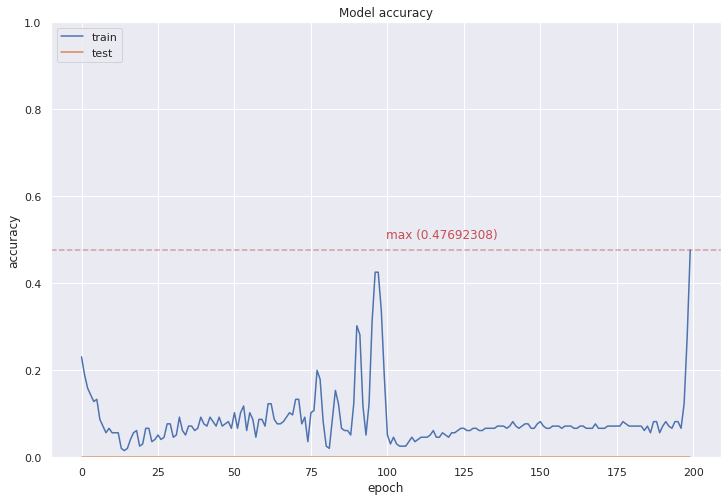

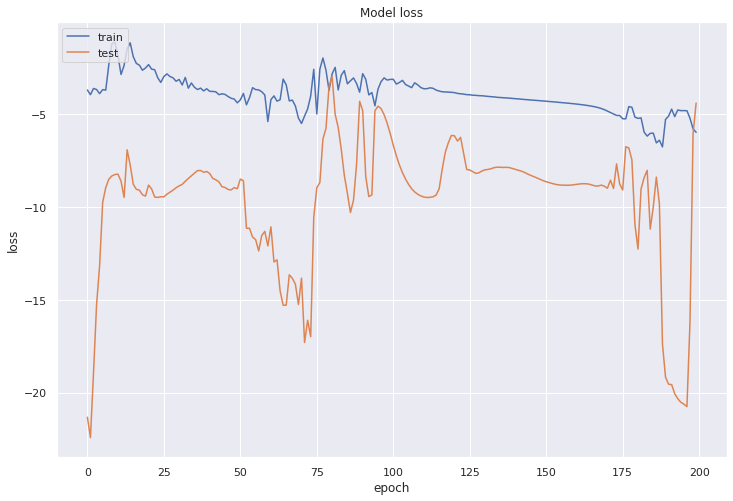


K-Fold:  9
Train on 195 samples, validate on 21 samples
Epoch 1/200
195/195 [==============================] - 2s 8ms/step - loss: -6.4593 - accuracy: 0.1641 - val_loss: 3.8512 - val_accuracy: 0.2381

Epoch 00001: val_accuracy improved from -inf to 0.23810, saving model to best_k_batch_size_model.pkl
Epoch 2/200
195/195 [==============================] - 0s 604us/step - loss: -6.3671 - accuracy: 0.1179 - val_loss: 4.5165 - val_accuracy: 0.2381

Epoch 00002: val_accuracy did not improve from 0.23810
Epoch 3/200
195/195 [==============================] - 0s 633us/step - loss: -5.7013 - accuracy: 0.0615 - val_loss: 3.5179 - val_accuracy: 0.2381

Epoch 00003: val_accuracy did not improve from 0.23810
Epoch 4/200
195/195 [==============================] - 0s 623us/step - loss: -6.4824 - accuracy: 0.0256 - val_loss: 1.6142 - val_accuracy: 0.2381

Epoch 00004: val_accuracy did not improve from 0.23810
Epoch 5/200
195/195 [==============================] - 0s 662us/step - loss: -6.5049 - accu

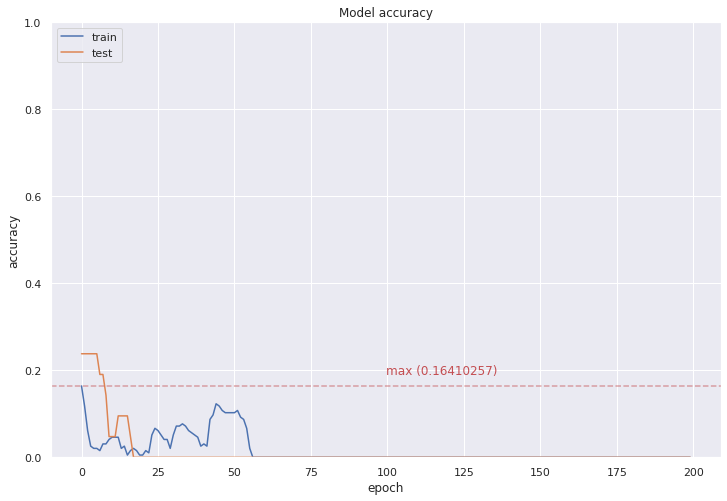

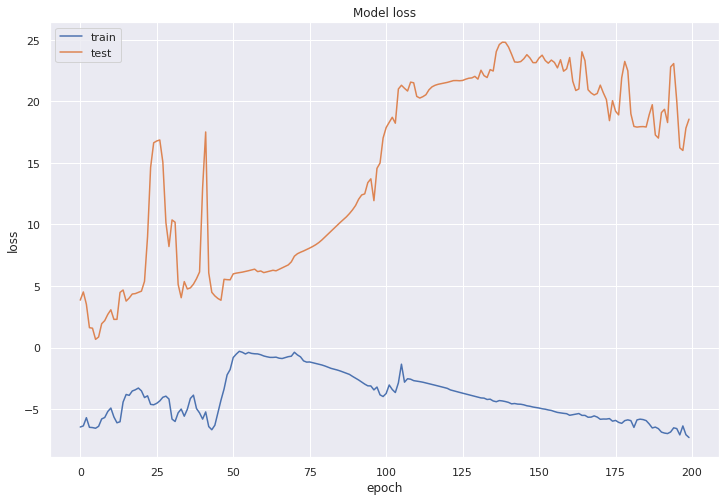


K-Fold:  10
Train on 195 samples, validate on 21 samples
Epoch 1/200
195/195 [==============================] - 2s 8ms/step - loss: -4.6974 - accuracy: 0.1282 - val_loss: -10.9630 - val_accuracy: 0.0952

Epoch 00001: val_accuracy improved from -inf to 0.09524, saving model to best_k_batch_size_model.pkl
Epoch 2/200
195/195 [==============================] - 0s 627us/step - loss: -3.9889 - accuracy: 0.0769 - val_loss: -11.8399 - val_accuracy: 0.0952

Epoch 00002: val_accuracy did not improve from 0.09524
Epoch 3/200
195/195 [==============================] - 0s 673us/step - loss: -4.6603 - accuracy: 0.0410 - val_loss: -12.9240 - val_accuracy: 0.0952

Epoch 00003: val_accuracy did not improve from 0.09524
Epoch 4/200
195/195 [==============================] - 0s 644us/step - loss: -4.9926 - accuracy: 0.0359 - val_loss: -12.0954 - val_accuracy: 0.0952

Epoch 00004: val_accuracy did not improve from 0.09524
Epoch 5/200
195/195 [==============================] - 0s 664us/step - loss: -4.97

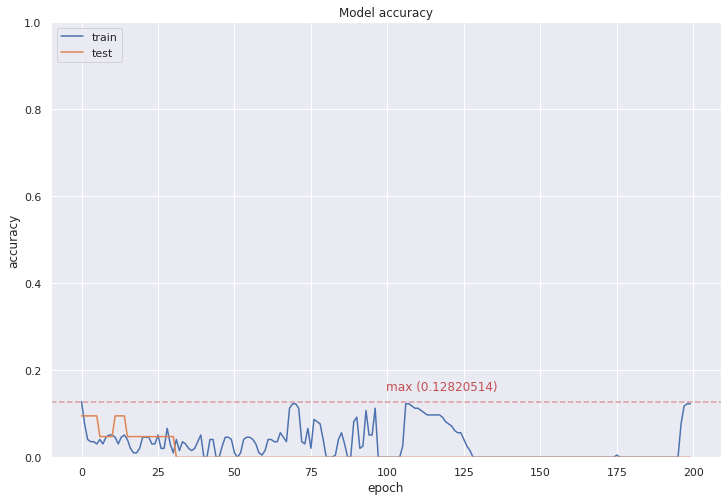

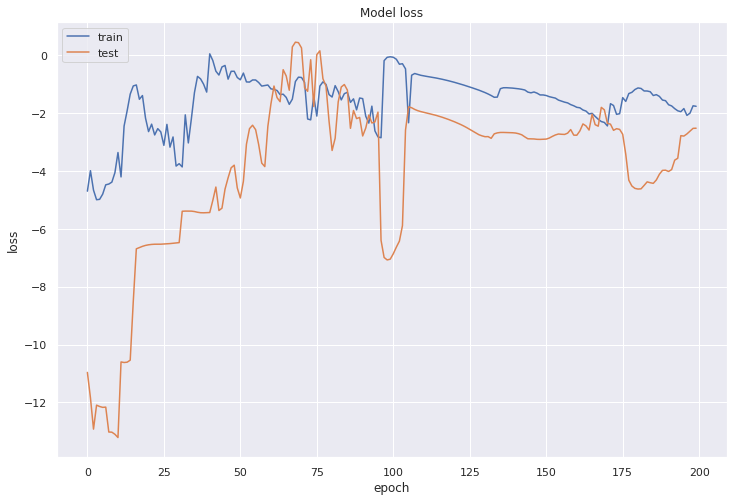

25.15% (+/- 23.07%)


In [0]:
_lstm_k_batch_size_model = lstm_model()
cvscores_batch_size_model = k_Fold(_lstm_k_batch_size_model, 'best_k_batch_size_model', _batch_size=200)

#### Accuracy Score Plot in K-Fold Cross Validation for batch size model

max:  0.7727272510528564
mean:  0.2515151508152485
std:  0.24320417867658356


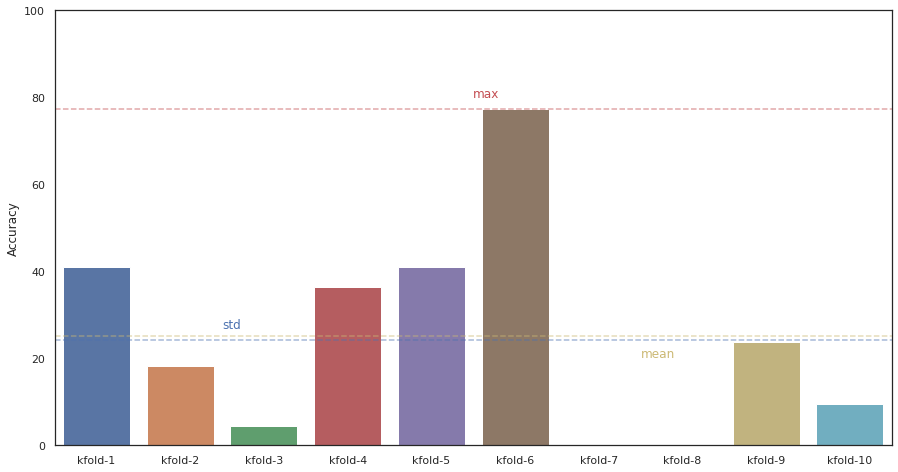

In [0]:
plot_bar_KFold_score(cvscores_batch_size_model)

### 4.4 Adjusting the loss function of the LSTM model

The loss function is an indicator of evaluating how well the LSTM modeled the data. We are attempting to model the dataset with different loss function this time. The loss function we use is called **Mean Squared Error**. This function attempts to penalise large errors and outcomes in a score that is in the same units as the data.

In [0]:
_lstm_loss_f_model = lstm_model(loss_f='mean_squared_error')
chk = ModelCheckpoint('best_model_loss_f.pkl', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
lstm_loss_f_m_history = _lstm_loss_f_model.fit(train, train_target, epochs=200, batch_size=200, callbacks=[chk], validation_data=(test,test_target))

#loading the model and calculating accuracy on the test data
_lstm_loss_f_model = load_model('best_model_loss_f.pkl')
test_preds = _lstm_loss_f_model.predict_classes(test)
print('accuracy: > ', accuracy_score(test_target, test_preds))

Train on 136 samples, validate on 34 samples
Epoch 1/200
136/136 [==============================] - 3s 21ms/step - loss: 0.2513 - accuracy: 0.3235 - val_loss: 0.2691 - val_accuracy: 0.2647

Epoch 00001: val_accuracy improved from -inf to 0.26471, saving model to best_model_loss_f.pkl
Epoch 2/200
136/136 [==============================] - 0s 908us/step - loss: 0.2444 - accuracy: 0.6250 - val_loss: 0.2896 - val_accuracy: 0.2353

Epoch 00002: val_accuracy did not improve from 0.26471
Epoch 3/200
136/136 [==============================] - 0s 816us/step - loss: 0.2387 - accuracy: 0.6176 - val_loss: 0.3063 - val_accuracy: 0.2941

Epoch 00003: val_accuracy improved from 0.26471 to 0.29412, saving model to best_model_loss_f.pkl
Epoch 4/200
136/136 [==============================] - 0s 843us/step - loss: 0.2328 - accuracy: 0.6397 - val_loss: 0.3190 - val_accuracy: 0.2353

Epoch 00004: val_accuracy did not improve from 0.29412
Epoch 5/200
136/136 [==============================] - 0s 1ms/step - 

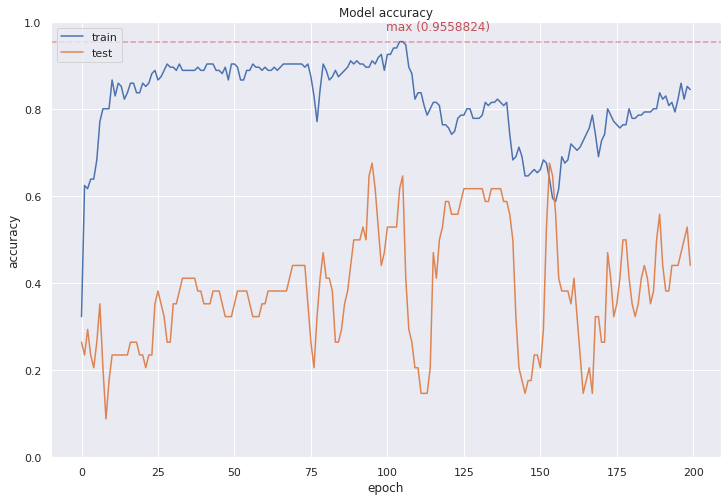

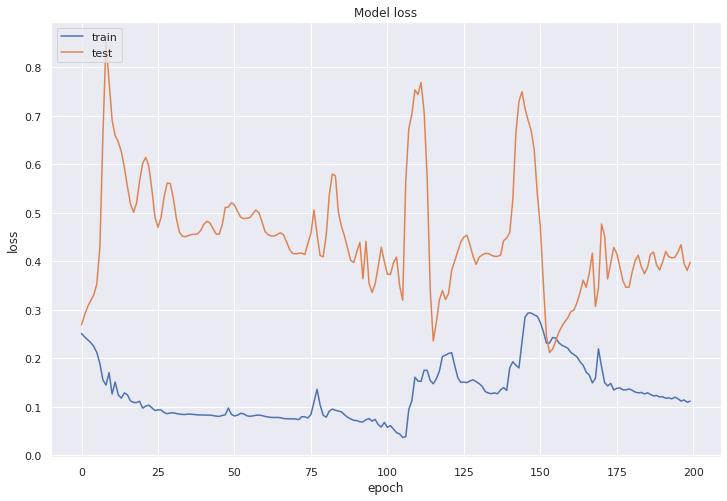

In [0]:
plot_histogram_of_performance(lstm_loss_f_m_history)

## 10 Fold Validation



K-Fold:  1
Train on 194 samples, validate on 22 samples
Epoch 1/200
194/194 [==============================] - 3s 16ms/step - loss: 1.3871 - accuracy: 0.0979 - val_loss: 0.2526 - val_accuracy: 0.4545

Epoch 00001: val_accuracy improved from -inf to 0.45455, saving model to best_model_loss_f.pkl
Epoch 2/200
194/194 [==============================] - 0s 1ms/step - loss: 1.3293 - accuracy: 0.0876 - val_loss: 0.2701 - val_accuracy: 0.3636

Epoch 00002: val_accuracy did not improve from 0.45455
Epoch 3/200
194/194 [==============================] - 0s 987us/step - loss: 1.2480 - accuracy: 0.0567 - val_loss: 0.3406 - val_accuracy: 0.2273

Epoch 00003: val_accuracy did not improve from 0.45455
Epoch 4/200
194/194 [==============================] - 0s 1ms/step - loss: 1.0813 - accuracy: 0.0103 - val_loss: 0.9529 - val_accuracy: 0.0000e+00

Epoch 00004: val_accuracy did not improve from 0.45455
Epoch 5/200
194/194 [==============================] - 0s 1ms/step - loss: 0.9929 - accuracy: 0.0000

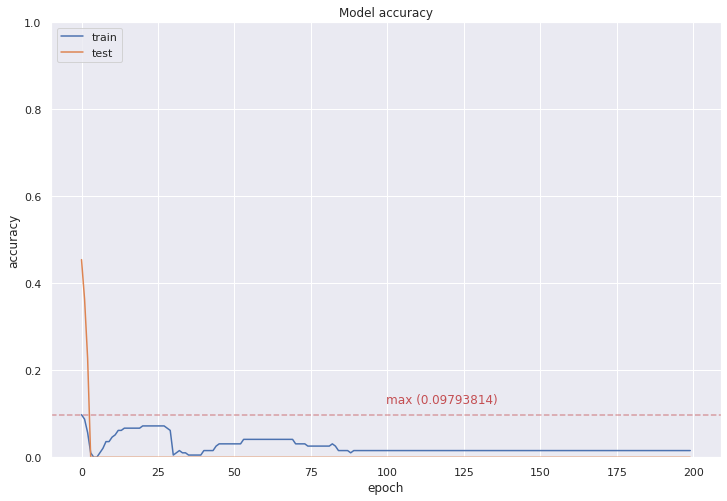

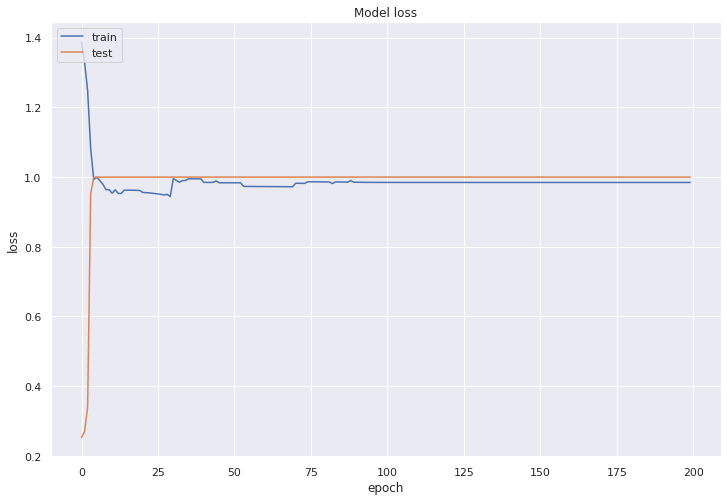


K-Fold:  2
Train on 194 samples, validate on 22 samples
Epoch 1/200
194/194 [==============================] - 2s 9ms/step - loss: 1.1556 - accuracy: 0.1392 - val_loss: 1.6838 - val_accuracy: 0.0455

Epoch 00001: val_accuracy improved from -inf to 0.04545, saving model to best_model_loss_f.pkl
Epoch 2/200
194/194 [==============================] - 0s 1ms/step - loss: 1.0939 - accuracy: 0.1443 - val_loss: 1.4822 - val_accuracy: 0.0455

Epoch 00002: val_accuracy did not improve from 0.04545
Epoch 3/200
194/194 [==============================] - 0s 974us/step - loss: 1.0278 - accuracy: 0.1082 - val_loss: 0.9694 - val_accuracy: 0.0455

Epoch 00003: val_accuracy did not improve from 0.04545
Epoch 4/200
194/194 [==============================] - 0s 1ms/step - loss: 0.9886 - accuracy: 0.0155 - val_loss: 0.9994 - val_accuracy: 0.0000e+00

Epoch 00004: val_accuracy did not improve from 0.04545
Epoch 5/200
194/194 [==============================] - 0s 1ms/step - loss: 0.9924 - accuracy: 0.0000e

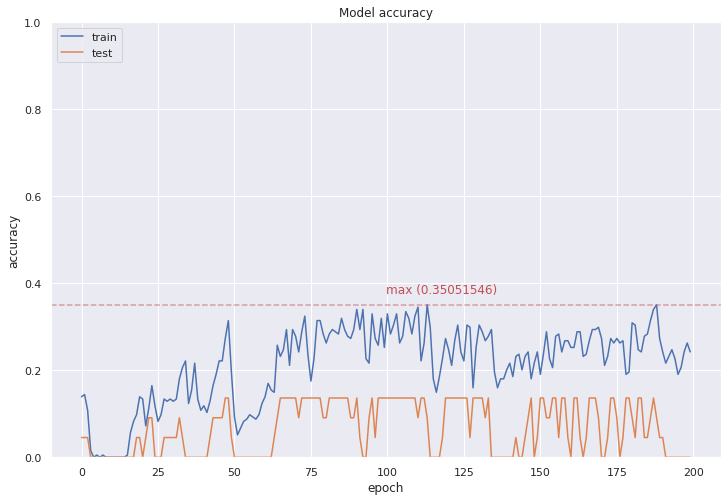

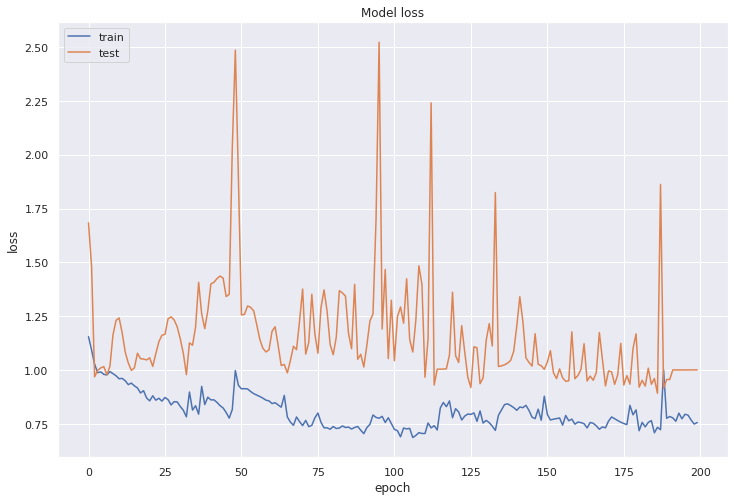


K-Fold:  3
Train on 194 samples, validate on 22 samples
Epoch 1/200
194/194 [==============================] - 2s 9ms/step - loss: 1.0186 - accuracy: 0.3454 - val_loss: 1.4696 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to best_model_loss_f.pkl
Epoch 2/200
194/194 [==============================] - 0s 1ms/step - loss: 0.8673 - accuracy: 0.2371 - val_loss: 1.3360 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/200
194/194 [==============================] - 0s 1ms/step - loss: 0.8298 - accuracy: 0.1804 - val_loss: 1.3597 - val_accuracy: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.00000
Epoch 4/200
194/194 [==============================] - 0s 948us/step - loss: 0.7902 - accuracy: 0.2371 - val_loss: 1.3073 - val_accuracy: 0.0000e+00

Epoch 00004: val_accuracy did not improve from 0.00000
Epoch 5/200
194/194 [==============================] - 0s 1ms/step - loss: 0.7673 - accur

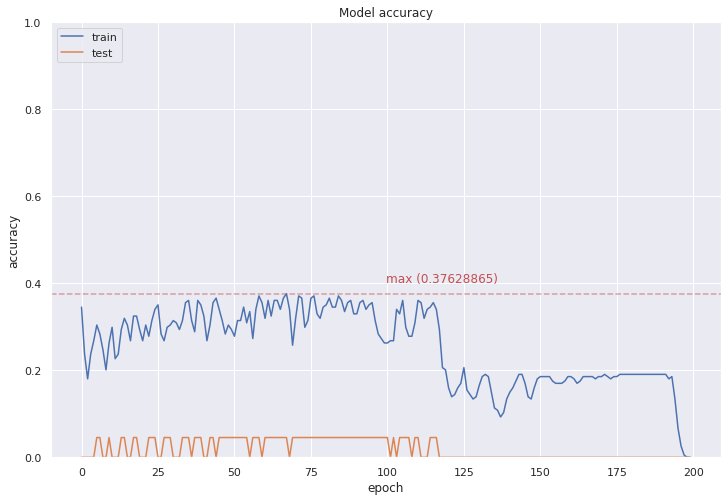

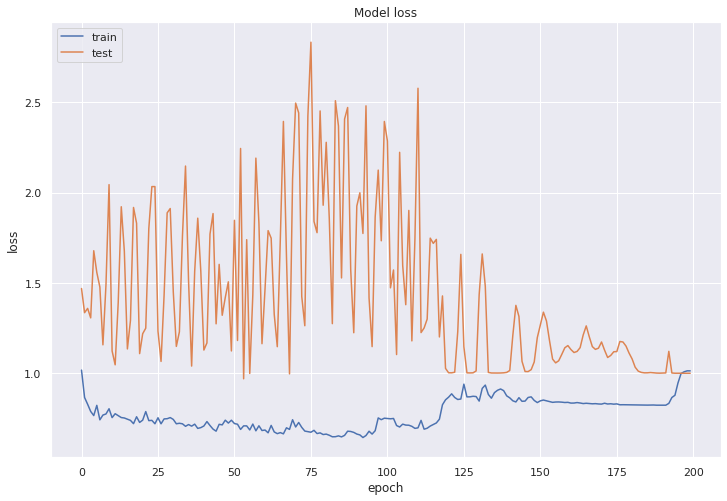


K-Fold:  4
Train on 194 samples, validate on 22 samples
Epoch 1/200
194/194 [==============================] - 2s 9ms/step - loss: 0.8617 - accuracy: 0.2216 - val_loss: 0.9846 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to best_model_loss_f.pkl
Epoch 2/200
194/194 [==============================] - 0s 1ms/step - loss: 0.8467 - accuracy: 0.1443 - val_loss: 0.9953 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/200
194/194 [==============================] - 0s 991us/step - loss: 0.8524 - accuracy: 0.1289 - val_loss: 0.9737 - val_accuracy: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.00000
Epoch 4/200
194/194 [==============================] - 0s 962us/step - loss: 0.8298 - accuracy: 0.1701 - val_loss: 0.7242 - val_accuracy: 0.1818

Epoch 00004: val_accuracy improved from 0.00000 to 0.18182, saving model to best_model_loss_f.pkl
Epoch 5/200
194/194 [===========================

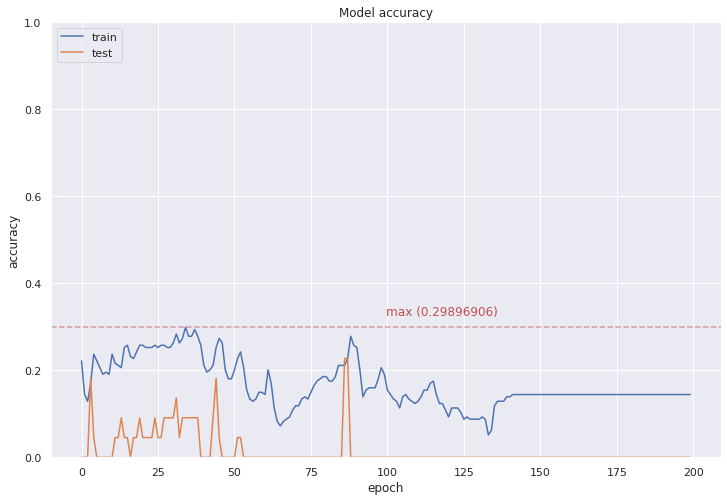

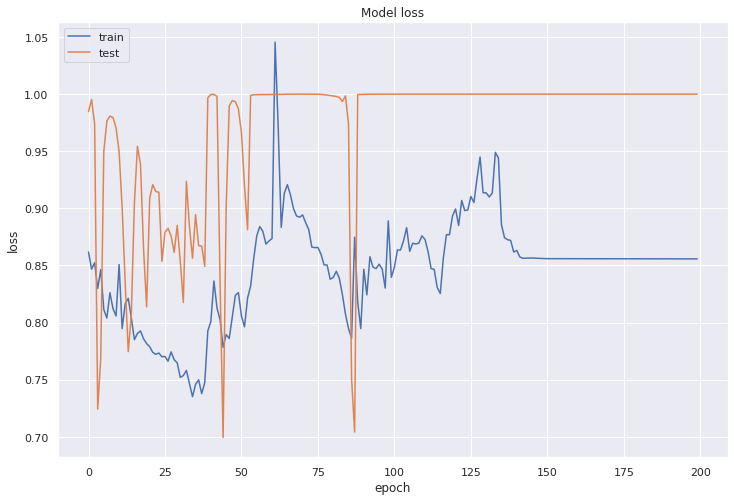


K-Fold:  5
Train on 194 samples, validate on 22 samples
Epoch 1/200
194/194 [==============================] - 2s 10ms/step - loss: 0.8693 - accuracy: 0.2165 - val_loss: 0.7536 - val_accuracy: 0.2273

Epoch 00001: val_accuracy improved from -inf to 0.22727, saving model to best_model_loss_f.pkl
Epoch 2/200
194/194 [==============================] - 0s 1ms/step - loss: 0.7817 - accuracy: 0.2526 - val_loss: 0.7427 - val_accuracy: 0.3182

Epoch 00002: val_accuracy improved from 0.22727 to 0.31818, saving model to best_model_loss_f.pkl
Epoch 3/200
194/194 [==============================] - 0s 1ms/step - loss: 0.7894 - accuracy: 0.3041 - val_loss: 0.7530 - val_accuracy: 0.2273

Epoch 00003: val_accuracy did not improve from 0.31818
Epoch 4/200
194/194 [==============================] - 0s 1ms/step - loss: 0.7853 - accuracy: 0.2320 - val_loss: 0.7659 - val_accuracy: 0.2273

Epoch 00004: val_accuracy did not improve from 0.31818
Epoch 5/200
194/194 [==============================] - 0s 990us

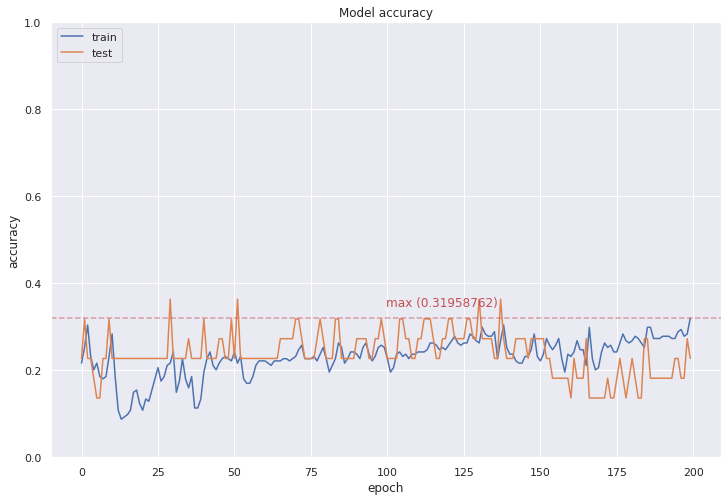

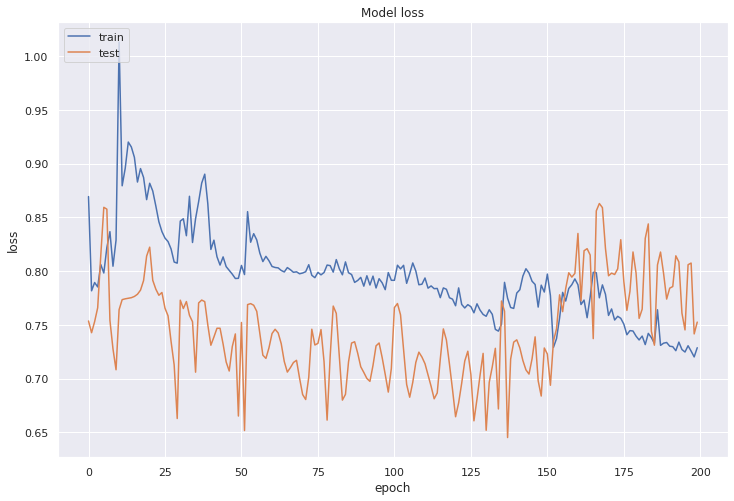


K-Fold:  6
Train on 194 samples, validate on 22 samples
Epoch 1/200
194/194 [==============================] - 2s 10ms/step - loss: 0.8907 - accuracy: 0.1907 - val_loss: 0.1820 - val_accuracy: 0.8182

Epoch 00001: val_accuracy improved from -inf to 0.81818, saving model to best_model_loss_f.pkl
Epoch 2/200
194/194 [==============================] - 0s 1ms/step - loss: 0.8973 - accuracy: 0.1031 - val_loss: 0.2244 - val_accuracy: 0.7727

Epoch 00002: val_accuracy did not improve from 0.81818
Epoch 3/200
194/194 [==============================] - 0s 965us/step - loss: 0.8849 - accuracy: 0.1340 - val_loss: 0.2248 - val_accuracy: 0.7727

Epoch 00003: val_accuracy did not improve from 0.81818
Epoch 4/200
194/194 [==============================] - 0s 1ms/step - loss: 0.8786 - accuracy: 0.1340 - val_loss: 0.1829 - val_accuracy: 0.8182

Epoch 00004: val_accuracy did not improve from 0.81818
Epoch 5/200
194/194 [==============================] - 0s 1ms/step - loss: 0.8979 - accuracy: 0.1598 - v

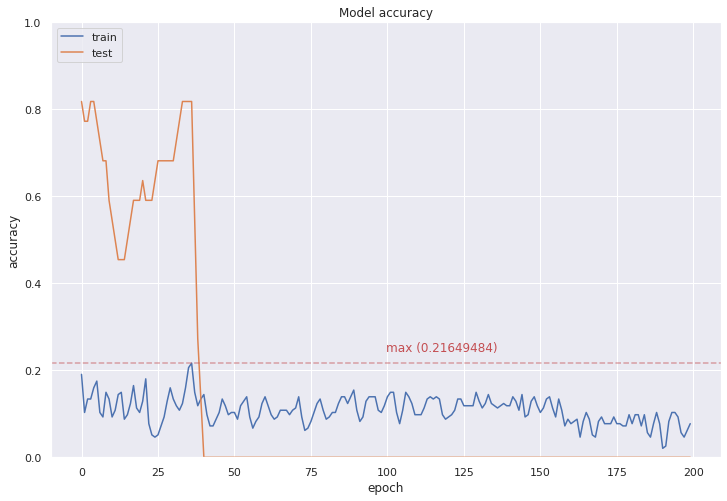

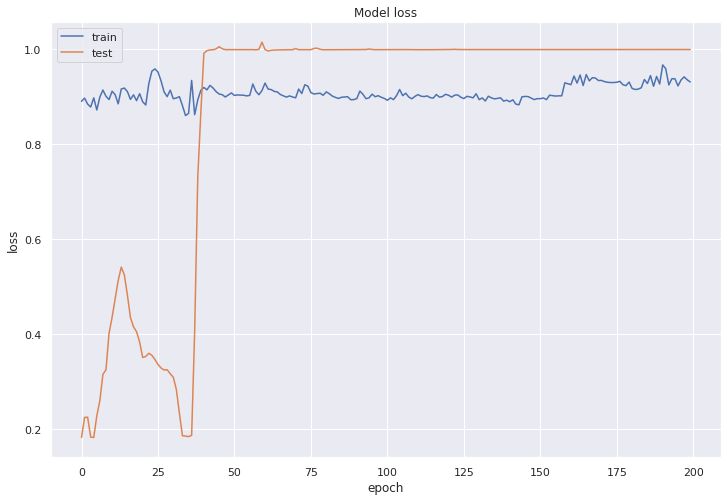


K-Fold:  7
Train on 195 samples, validate on 21 samples
Epoch 1/200
195/195 [==============================] - 2s 9ms/step - loss: 0.7886 - accuracy: 0.1949 - val_loss: 1.2935 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to best_model_loss_f.pkl
Epoch 2/200
195/195 [==============================] - 0s 994us/step - loss: 0.7787 - accuracy: 0.2359 - val_loss: 1.3967 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/200
195/195 [==============================] - 0s 1ms/step - loss: 0.7610 - accuracy: 0.2308 - val_loss: 1.3061 - val_accuracy: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.00000
Epoch 4/200
195/195 [==============================] - 0s 1ms/step - loss: 0.7636 - accuracy: 0.2205 - val_loss: 1.3936 - val_accuracy: 0.0000e+00

Epoch 00004: val_accuracy did not improve from 0.00000
Epoch 5/200
195/195 [==============================] - 0s 987us/step - loss: 0.7568 - acc

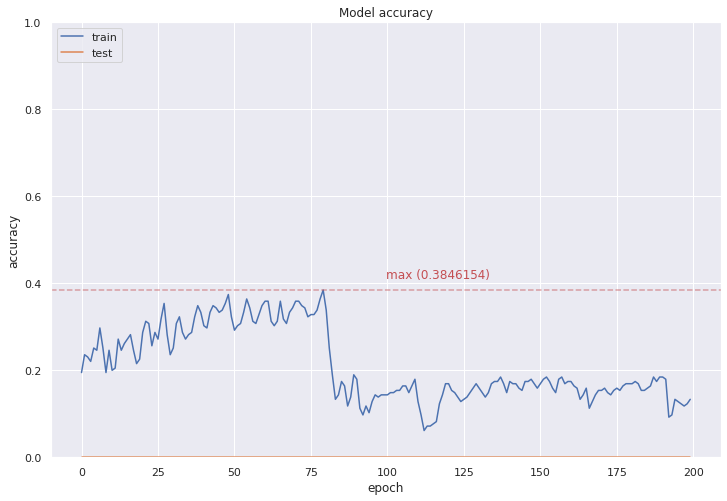

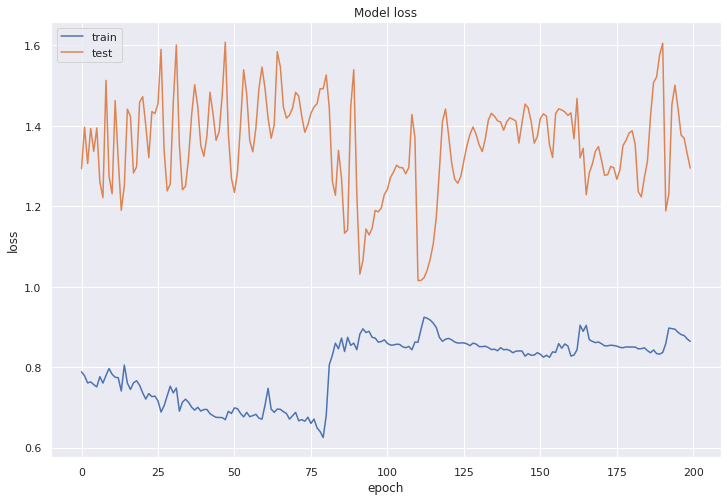


K-Fold:  8
Train on 195 samples, validate on 21 samples
Epoch 1/200
195/195 [==============================] - 2s 10ms/step - loss: 0.8088 - accuracy: 0.2205 - val_loss: 1.0513 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to best_model_loss_f.pkl
Epoch 2/200
195/195 [==============================] - 0s 1ms/step - loss: 0.7849 - accuracy: 0.2205 - val_loss: 1.0324 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/200
195/195 [==============================] - 0s 955us/step - loss: 0.7976 - accuracy: 0.2000 - val_loss: 1.0673 - val_accuracy: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.00000
Epoch 4/200
195/195 [==============================] - 0s 1ms/step - loss: 0.7908 - accuracy: 0.2205 - val_loss: 1.1682 - val_accuracy: 0.0000e+00

Epoch 00004: val_accuracy did not improve from 0.00000
Epoch 5/200
195/195 [==============================] - 0s 1ms/step - loss: 0.7816 - accu

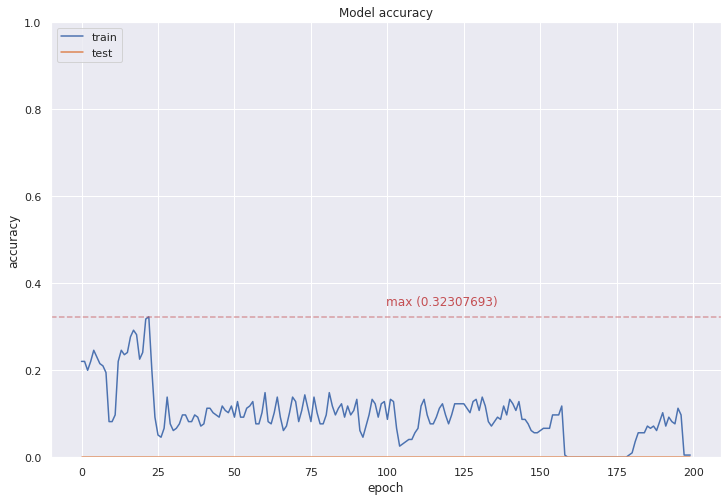

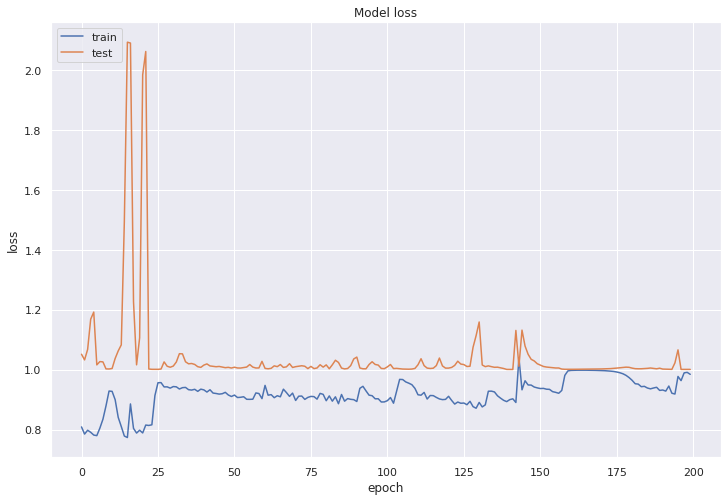


K-Fold:  9
Train on 195 samples, validate on 21 samples
Epoch 1/200
195/195 [==============================] - 2s 10ms/step - loss: 0.8392 - accuracy: 0.1744 - val_loss: 0.7444 - val_accuracy: 0.1429

Epoch 00001: val_accuracy improved from -inf to 0.14286, saving model to best_model_loss_f.pkl
Epoch 2/200
195/195 [==============================] - 0s 1ms/step - loss: 0.8409 - accuracy: 0.1641 - val_loss: 0.7869 - val_accuracy: 0.0952

Epoch 00002: val_accuracy did not improve from 0.14286
Epoch 3/200
195/195 [==============================] - 0s 1ms/step - loss: 0.8439 - accuracy: 0.1641 - val_loss: 0.7794 - val_accuracy: 0.0952

Epoch 00003: val_accuracy did not improve from 0.14286
Epoch 4/200
195/195 [==============================] - 0s 994us/step - loss: 0.8433 - accuracy: 0.1641 - val_loss: 0.7426 - val_accuracy: 0.1429

Epoch 00004: val_accuracy did not improve from 0.14286
Epoch 5/200
195/195 [==============================] - 0s 961us/step - loss: 0.8392 - accuracy: 0.1692 -

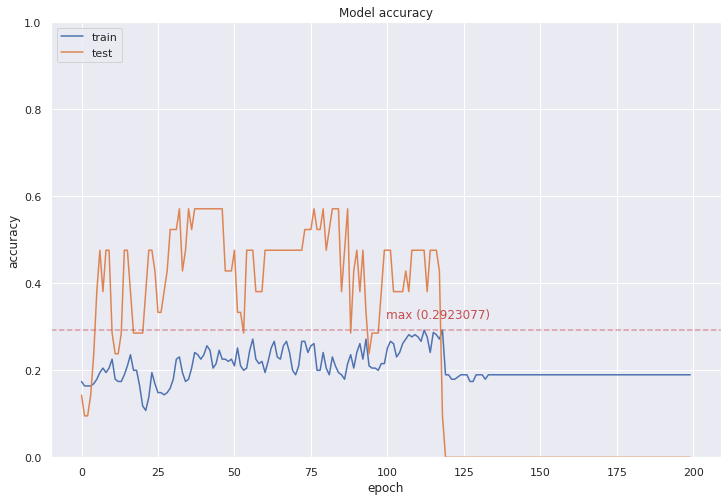

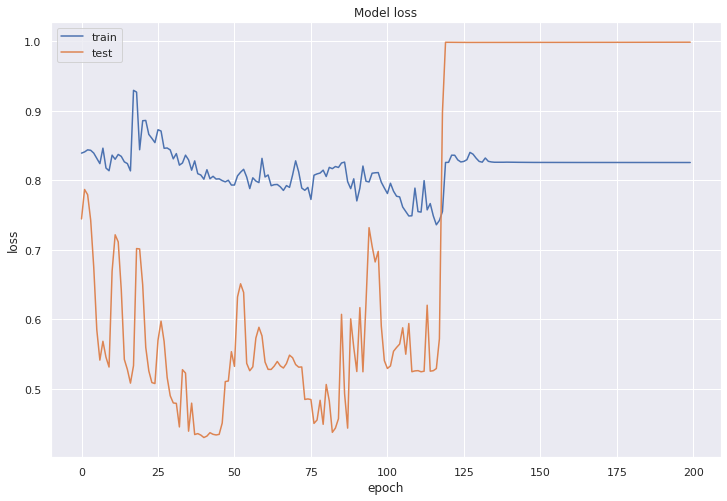


K-Fold:  10
Train on 195 samples, validate on 21 samples
Epoch 1/200
195/195 [==============================] - 2s 10ms/step - loss: 0.8003 - accuracy: 0.2154 - val_loss: 0.6871 - val_accuracy: 0.2857

Epoch 00001: val_accuracy improved from -inf to 0.28571, saving model to best_model_loss_f.pkl
Epoch 2/200
195/195 [==============================] - 0s 1ms/step - loss: 0.8051 - accuracy: 0.2000 - val_loss: 0.6755 - val_accuracy: 0.3333

Epoch 00002: val_accuracy improved from 0.28571 to 0.33333, saving model to best_model_loss_f.pkl
Epoch 3/200
195/195 [==============================] - 0s 1ms/step - loss: 0.8026 - accuracy: 0.2256 - val_loss: 0.6710 - val_accuracy: 0.3333

Epoch 00003: val_accuracy did not improve from 0.33333
Epoch 4/200
195/195 [==============================] - 0s 1ms/step - loss: 0.8051 - accuracy: 0.2718 - val_loss: 0.6743 - val_accuracy: 0.3333

Epoch 00004: val_accuracy did not improve from 0.33333
Epoch 5/200
195/195 [==============================] - 0s 1ms/

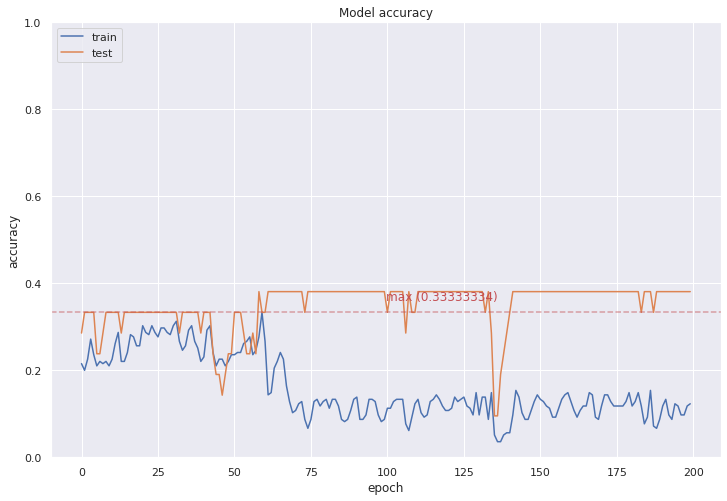

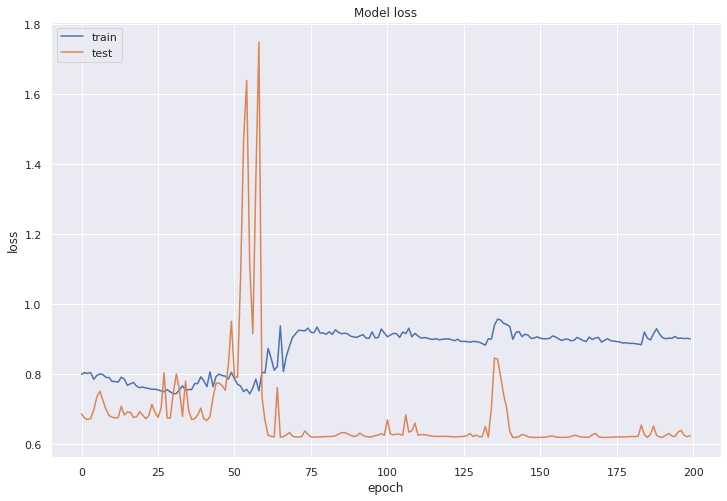

29.98% (+/- 25.56%)


In [0]:
_lstm_loss_f_model = lstm_model(loss_f='mean_squared_error')
cvscores_loss_f_model = k_Fold(_lstm_loss_f_model, 'best_model_loss_f')

#### Accuracy Score Plot in K-Fold Cross Validation for batch size model

max:  0.8181818127632141
mean:  0.29978355616331104
std:  0.26947110460970297


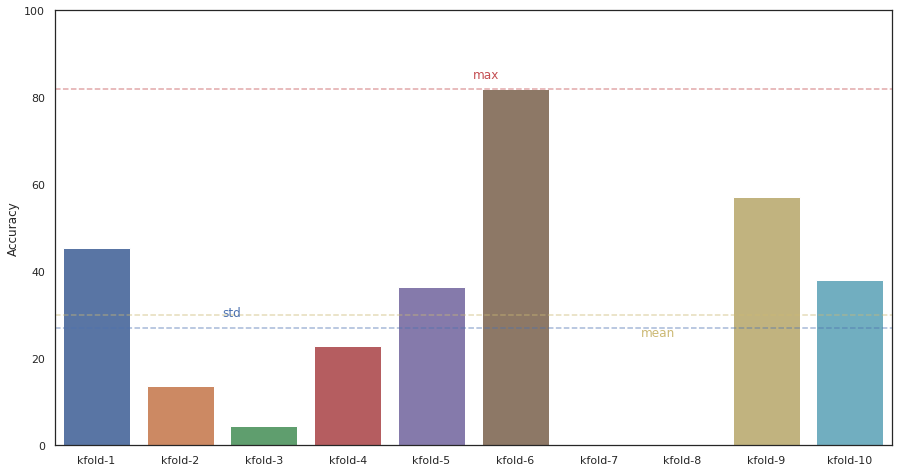

In [0]:
plot_bar_KFold_score(cvscores_loss_f_model)

# 5. Conclusion

In sections 2 - 4 we have presented some implementations of the **LSTM** model in a time-series data from Wireless Sensor Network. Furthermore, we performed validation with 10-fold cross validation technique to find out which combination of training, testing, validation is most appropriate.  Initially, we examined the case of the base model performed with the default configuration and in **10-fold validation**.  We realised that our default configuration was not optimal and produced remarkable fluctuation to the testing data although it showed that at 6-fold is the ideal split of the data as it can produce the highest score.  

In section 4 we illustrated how different configuration / hyper-parameters can affect the **performance, learning rate, robustness** of the model when changing one parameter at a time. Decreasing the number of neurons (units) to the LSTM model proves that can increase the overall accuracy of the model whereas tuning the loss function can have substantial impact of how well the model performed on the data. Minimal influence to our model in the testing data was with the Tanh activation function and the size of the batch. However, in 10-fold cross validation was apparent that Tanh reached excellent score to more than one folds unlike the batch size which had only on the 6-fold with above **77%** . 

Ultimately, the time-series data is quite small** (216 samples)** to train an LSTM model and obtains high accuracy in testing data. Additionally, 10-fold cross validation without modification can be worthless effort in view of time-series data. As we have indicated, there are other methods to validate time-series data on a model such as sliding or rolling window etc. Although, as a whole, our models performed well for the given dataset and therefore can be able to predict the movements of the user in standard cases. 
